# Exploratory Data Analysis of Smart Device Usage for Strategic Insights for Bellabeat

## 📍 About Bellabeat

Bellabeat is a health-focused tech company that manufactures smart devices designed specifically for women. Their products help users track key health metrics such as steps, heart rate, sleep patterns, and activity levels. Although currently a small player, Bellabeat has the potential to scale and compete in the global smart device market.

## 🎯 Project Objectives

**General Objective**

Identify user behavior patterns in smart health device usage and extract actionable insights to support Bellabeat’s product and marketing strategies.

**Specific Objectives**
1. Prepare and understand the dataset.
2. Clean and format the data for analysis.
3. Perform exploratory data analysis (EDA).
4. Generate insights based on data trends.
5. Visualize results to support business recommendations.

## ❓ Key Questions

1. What are the common trends in smart device usage?
2. How do these trends align with Bellabeat’s customer base?
3. How can insights from these trends inform Bellabeat’s marketing strategy?


# 1. DATA OVERVIEW

The dataset used in this analysis was made publicly available through **FitBit Fitness Tracker Data**, which contains personal fitness tracking data from 30 users. It was generated from a distributed survey via Amazon Mechanical Turk (AMT) in 2016. The data was collected from users who consented to share their personal tracker information from their Fitbit devices.

### Key Characteristics:
- **Number of participants**: 30 users
- **Date range**: March 12, 2016 – May 12, 2016
- **Device type**: Fitbit
- **Data frequency**: Daily and hourly records
- **Data format**: Multiple `.csv` files with different categories of information

### Files included:
- **dailyActivity_merged.csv** – Steps, calories, intensity, and distance data per day
- **dailyCalories_merged.csv** – Daily calories burned
- **dailyIntensities_merged.csv** – Activity intensities per day
- **dailySteps_merged.csv** – Steps per day
- **heartrate_seconds_merged.csv** – Heart rate per second
- **hourlyCalories_merged.csv** – Calories per hour
- **hourlyIntensities_merged.csv** – Intensity levels per hour
- **hourlySteps_merged.csv** – Steps per hour
- **minuteCaloriesNarrow_merged** – Calories per minute, on a narrow format
- **minuteCaloriesWide_merged.csv** – Calories pero minute, on a wide format
- **minuteIntensitiesNarrow_merged.csv** – Intensity levels per minute, on a narrow format
- **minuteIntensitiesWide_merged.csv** – Intensity levels per minute, on a wide format
- **minuteMETsNarrow_merged.csv** – MET levels per minute, on a narrow format
- **minuteSleep_merged.csv** – Sleeping time in minutes.
- **minuteStepsNarrow_merged.csv** – Steps per minutes on a Narrow format
- **minutesStepsWide_merged.csv** – Steps per minute on a Wide format. 
- **sleepDay_merged.csv** – Sleep data (time in bed, minutes asleep)
- **weightLogInfo_merged.csv** – Weight and BMI logs


### Limitations:
- Data comes from a **small, non-random sample** (30 users) and may not represent the entire Bellabeat customer base.
- All participants are **Fitbit users**, not Bellabeat users — insights will need **adaptation** before being applied to Bellabeat.
- Some tables contain **missing or inconsistent values**, requiring data cleaning and validation.

The dataset provides a useful proxy for understanding how users interact with smart health devices on a daily basis. The following sections will clean, prepare, and analyze this data to derive insights relevant to Bellabeat’s business goals.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
# Load data.

# Full Data all merged.
d_activity = pd.read_csv('Fitabase/dailyActivity_merged.csv')
# Daily data ...MERGED.
d_calories = pd.read_csv('Fitabase/dailyCalories_merged.csv')
d_intensities = pd.read_csv('Fitabase/dailyIntensities_merged.csv')
d_steps = pd.read_csv('Fitabase/dailySteps_merged.csv')
d_sleep = pd.read_csv('Fitabase/sleepDay_merged.csv')
# Hourly data ... MERGED.
h_calories = pd.read_csv('Fitabase/hourlyCalories_merged.csv')
h_intensities = pd.read_csv('Fitabase/hourlyIntensities_merged.csv')
h_steps = pd.read_csv('Fitabase/hourlySteps_merged.csv')
# Minutes Data ... MERGED and NARRAW (Wide format is discarded)
m_calories = pd.read_csv('Fitabase/minuteCaloriesNarrow_merged.csv')
m_intensities = pd.read_csv('Fitabase/minuteIntensitiesNarrow_merged.csv')
m_steps = pd.read_csv('Fitabase/minuteStepsNarrow_merged.csv')
m_sleep = pd.read_csv('Fitabase/minuteSleep_merged.csv')
m_METs = pd.read_csv('Fitabase/minuteMETsNarrow_merged.csv')
# Others
sec_heart_rate = pd.read_csv('Fitabase/heartrate_seconds_merged.csv')
Log_info = pd.read_csv('Fitabase/weightLogInfo_merged.csv')

**NOTE**: **Metadata for this dataset is unavailable, so measurement units are not explicitly defined. Units will be inferred during data exploration.**

# 2. Data Cleaning

## 2.1 Daily Tables

### 2.1.1 Daily Activity Table

In [3]:
d_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


Across all columns, the minimum value is 0, suggesting that some users may not use the device consistently. Conversely, the maximum values reflect the presence of highly active individuals.  
The column **Logged Activities Distance** indicates that very few users manually log their activity — most rely on automatic tracking.  

However, we also observe anomalies, such as a record of **4,900 kcal burned in a single day**, which seems unrealistic. Further checks are needed to determine whether similar outliers exist and how to address them.  

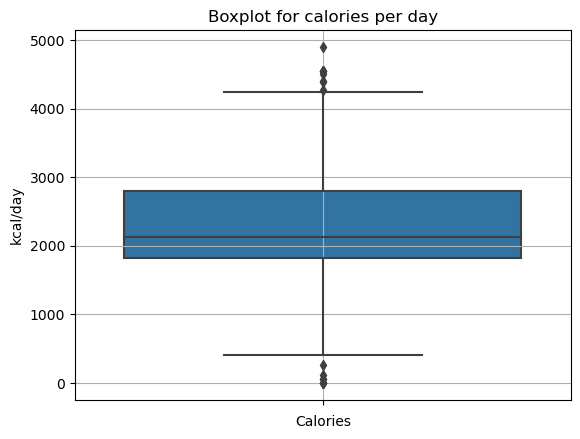

In [4]:
# Let's make a boxplot to Calories column to look for outliers.
sb.boxplot(data=d_activity, y='Calories')
plt.title('Boxplot for calories per day')
plt.xlabel('Calories')
plt.ylabel('kcal/day')
plt.grid('True')
plt.show()

The boxplot reveals the presence of outliers, both below the minimum and above the maximum.  
- **Low values** (close to zero) are not unusual in real life, as they may simply reflect inactivity or the device not being worn.  
- **High values** (>4,000 kcal/day) are more questionable, since only elite athletes are likely to reach such levels. These extreme cases warrant further investigation.  

In [5]:
# Let's see how many records have more then certain values of calories
cal_more_than_2000 = (d_activity['Calories'] > 2000).sum()
cal_more_than_3000 = (d_activity['Calories'] > 3000).sum()
cal_more_than_3500 = (d_activity['Calories'] > 3500).sum()
cal_more_than_4000 = (d_activity['Calories'] > 4000).sum()

print(f'More then 2000 kcal: {cal_more_than_2000}')
print(f'More than 3000 kcal: {cal_more_than_3000}')
print(f'More than 3500 kcal: {cal_more_than_3500}')
print(f'More than 4000 kcal: {cal_more_than_4000}')

More then 2000 kcal: 571
More than 3000 kcal: 153
More than 3500 kcal: 63
More than 4000 kcal: 21


We identified **63 records** with more than 3,500 kcal burned in a single day, and **21 records** exceeding 4,000 kcal. These values appear unusual. Next, we will check how many different users these records belong to.  

In [6]:

calorias_altas = d_activity[d_activity['Calories'] > 4000].groupby('Id')['Calories'].size().reset_index(name='Registros_calorias_>4000')
total_registros = d_activity.groupby('Id').size().reset_index(name='Total_registros')
media_registros = d_activity.groupby('Id')['Calories'].mean().reset_index(name='mean_cal')
resultado = pd.merge(pd.merge(calorias_altas, total_registros, on='Id'), media_registros, on='Id')
resultado

,Id,Registros_calorias_>4000,Total_registros,mean_cal
0,4388161847,1,31,3093.870968
1,5577150313,8,30,3359.633333
2,6117666160,1,28,2261.142857
3,8378563200,7,31,3436.580645
4,8877689391,4,31,3420.258065


Although burning more than 4,000 kcal in a day may seem excessive, it is achievable for athletic individuals, tall users, or those with high metabolic rates. The fact that users who recorded >4,000 kcal also show consistently high daily averages suggests they are genuinely very active. Therefore, we will **retain these records** in the dataset.  

In [7]:
# Let's see if there are null cells
d_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

No null values were detected in this table.  

In [8]:
# Let's see if there are any duplicated row
d_activity.duplicated().any()

False

In [9]:
# Let's take a pick to the first 5 rows to see how the data looks like
d_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [10]:
# Let's see more details about columns propeties
d_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

#### Observations on `dailyActivity` Table
1. The **`ActivityDate`** column is stored as `object`. First, we will check for leading or trailing spaces, then convert it to `datetime`.  
2. The **`Id`** column will be converted to `string` to avoid unintended mathematical operations.  
3. Distance units are assumed to be **miles**.  
4. Calorie units are assumed to be **kcal**.  
5. The dataset contains no null values or duplicated rows.  

In [11]:
# Let's remove any blank space from 'ActivityDate' column

for col in d_activity.select_dtypes(include=['object', 'string']).columns:
    d_activity[col] = d_activity[col].str.strip()

# Next, we convert it to Date Time type
d_activity['ActivityDate'] = pd.to_datetime(d_activity['ActivityDate'])

d_activity['ActivityDate'].head(2)

0   2016-04-12
1   2016-04-13
Name: ActivityDate, dtype: datetime64[ns]

In [12]:
# Let's convert 'Id' column to string

d_activity['Id'] = d_activity['Id'].astype(str)
d_activity['Id'].head(2)

0    1503960366
1    1503960366
Name: Id, dtype: object

Finally, we will create two new columns:  
- **Day of the week** for each record.  
- **Month** to group activity by broader timeframes.  

In [13]:
# Create column for the month
d_activity['Month'] = d_activity['ActivityDate'].dt.strftime('%B')
#Create column for the day
d_activity['Day_of_week'] = d_activity['ActivityDate'].dt.day_name()
# Create column for the number of the week of the year
d_activity['Number_of_week'] = d_activity['ActivityDate'].dt.isocalendar().week

d_activity.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Month,Day_of_week,Number_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,April,Tuesday,15
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,April,Wednesday,15


### 2.1.2 Daily calories table.

In [14]:
d_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [15]:
# Let's see if this table of calories contain the same data that 'Calories' column from d_activity has

set(d_activity['Calories']) == set(d_calories['Calories'])

True

This table contains the same information already merged into the `dailyActivity` table, so no further cleaning is required.  
However, we will:  
- Convert the **`Id`** column to `string`.  
- Rename **`ActivityDay`** to **`ActivityDate`** for consistency.  
- Convert **`ActivityDate`** to `datetime`.  

In [16]:
d_calories['Id'].dtype

dtype('int64')

In [17]:
# Let's convert 'Id' columns to str type just in case.
d_calories['Id'] = d_calories['Id'].astype(str)
d_calories['Id'].dtype

dtype('O')

In [18]:
# Let's change 'ActivityDate' column name
d_calories = d_calories.rename(columns={'ActivityDay':'ActivityDate'})
d_calories.columns

Index(['Id', 'ActivityDate', 'Calories'], dtype='object')

In [19]:
# Let's change ActivityDate type
# First, let's make sure there ir no blank space
d_calories['ActivityDate'] = d_calories['ActivityDate'].str.strip()
# Now, let's change the type
d_calories['ActivityDate'] = pd.to_datetime(d_calories['ActivityDate'])

d_calories['ActivityDate'].head(3)

0   2016-04-12
1   2016-04-13
2   2016-04-14
Name: ActivityDate, dtype: datetime64[ns]

### 2.1.3 Daily Intensities table.

In [20]:
d_intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


We will:  
- Convert the **`Id`** column to `string`.  
- Rename **`ActivityDay`** to **`ActivityDate`**.  
- Convert **`ActivityDate`** to `datetime`. 

In [21]:
# Let's change Id columns type to str
d_intensities['Id'] = d_intensities['Id'].astype(str)
# Let's change ActivityDay column name
d_intensities = d_intensities.rename(columns={'ActivityDay':'ActivityDate'})
# Let's change ActivityDate type
d_intensities['ActivityDate'] = pd.to_datetime(d_intensities['ActivityDate'])

d_intensities.dtypes

Id                                  object
ActivityDate                datetime64[ns]
SedentaryMinutes                     int64
LightlyActiveMinutes                 int64
FairlyActiveMinutes                  int64
VeryActiveMinutes                    int64
SedentaryActiveDistance            float64
LightActiveDistance                float64
ModeratelyActiveDistance           float64
VeryActiveDistance                 float64
dtype: object

In [22]:
# Let's see if these columns are exactly the same as the ones found in d_activity table.

columnss = ['Id', 'ActivityDate', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance',
       'LightActiveDistance', 'ModeratelyActiveDistance',
       'VeryActiveDistance']

for col in columnss:
    print(set(d_activity[col]) == set(d_intensities[col]))
    

True
True
True
True
True
True
True
True
True
True


Note: The `d_intensities` table is already included within the `d_activity` dataset. 

### 2.1.4 Daily steps table.

In [23]:
d_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


We will:  
- Convert the **`Id`** column to `string`.  
- Rename **`ActivityDay`** to **`ActivityDate`** and convert it to `datetime`.  
- Rename **`StepTotal`** to **`TotalSteps`** for consistency with the `d_activity` table.  
- Verify if this dataset overlaps with the information already included in `d_activity`.  

In [24]:
# Let's change Id columns type to str
d_steps['Id'] = d_steps['Id'].astype(str)
# Let's change ActivityDay column name
d_steps = d_steps.rename(columns={'ActivityDay':'ActivityDate'})
# Let's change ActivityDate type
d_steps['ActivityDate'] = pd.to_datetime(d_steps['ActivityDate'])

d_steps.dtypes

Id                      object
ActivityDate    datetime64[ns]
StepTotal                int64
dtype: object

Note: The `d_steps` dataset is already included within the `d_activity` table.  

### 2.1.5 Daily Sleep table.

In [25]:
d_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


As with previous tables, we will:  
- Convert the **`Id`** column to `string`.  
- Convert **`SleepDay`** to `datetime`.  

In [26]:
# Let's change Id type to STR
d_sleep['Id'] = d_sleep['Id'].astype(str)
# Let's change Sleep Day to datetime type
# Let's see blank spaces
d_sleep['SleepDay'] = d_sleep['SleepDay'].str.strip()
d_sleep['SleepDay'] = pd.to_datetime(d_sleep['SleepDay'])

d_sleep.dtypes

C:\Users\basti\AppData\Local\Temp\ipykernel_9444\3416030785.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d_sleep['SleepDay'] = pd.to_datetime(d_sleep['SleepDay'])


Id                            object
SleepDay              datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object

In [27]:
d_sleep.select_dtypes(exclude=['datetime64']).describe()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,413.000000,413.000000,413.000000
mean,1.118644,419.467312,458.639225
std,0.345521,118.344679,127.101607
min,1.000000,58.000000,61.000000
25%,1.000000,361.000000,403.000000
50%,1.000000,433.000000,463.000000
75%,1.000000,490.000000,526.000000
max,3.000000,796.000000,961.000000


The maximum values for **Total Minutes Asleep** and **Total Time in Bed** appear unusually high. A boxplot will help us visualize potential outliers.  

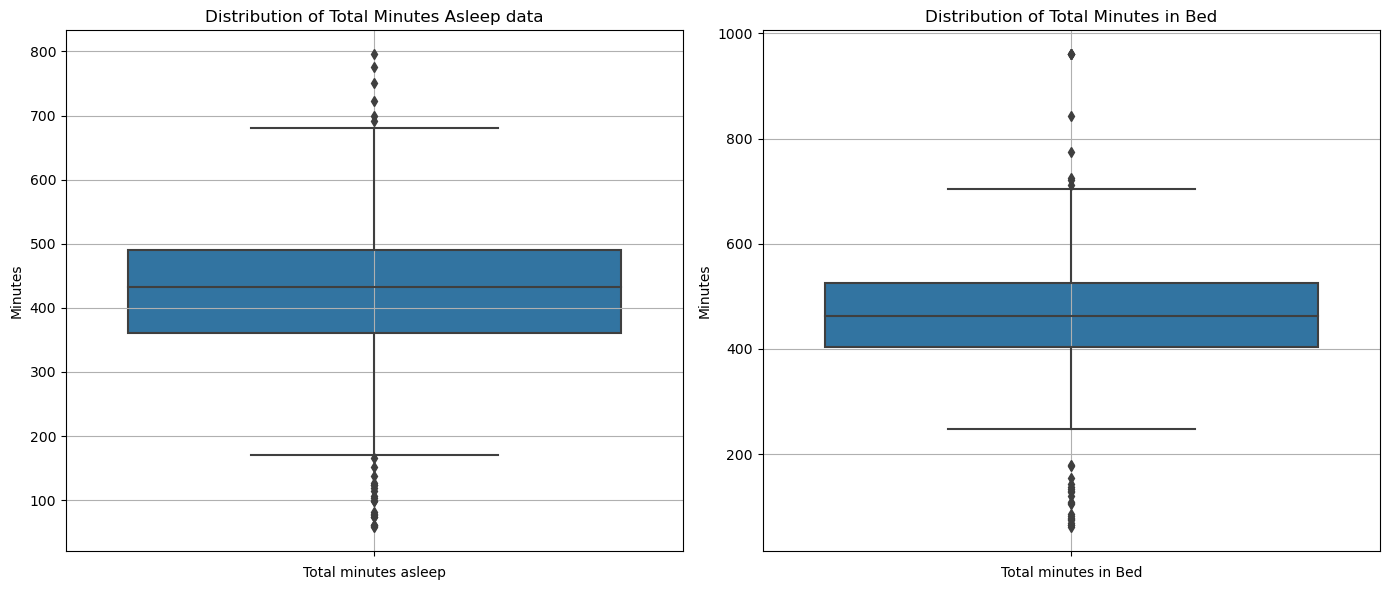

In [28]:
# Create figure
figure , axes = plt.subplots(1, 2, figsize=(14,6))

#Create boxplots
sb.boxplot(data=d_sleep, y='TotalMinutesAsleep', ax=axes[0])
axes[0].set_title('Distribution of Total Minutes Asleep data')
axes[0].set_xlabel('Total minutes asleep')
axes[0].set_ylabel('Minutes')
axes[0].grid()

sb.boxplot(data=d_sleep, y='TotalTimeInBed', ax=axes[1])
axes[1].set_title('Distribution of Total Minutes in Bed')
axes[1].set_xlabel('Total minutes in Bed')
axes[1].set_ylabel('Minutes')
axes[1].grid()

plt.tight_layout()
plt.show()

The boxplot shows several values below the lower bound, which may still be valid as they could correspond to short naps.  
On the other hand, values above the maximum are rare and appear abnormal. For example:  
- Sleeping **>800 minutes (≈13 hours)** in a day is unlikely, though possible if spread across multiple sleep sessions.  
- Spending **>600 minutes in bed (≈10 hours)** is unusual for adults, though children may reach such durations.  

We will analyze how many such records exist before deciding how to handle them.  

In [29]:
high_sleep = d_sleep[d_sleep['TotalMinutesAsleep'] > 700].groupby('Id')['TotalMinutesAsleep'].size().reset_index(name='Registros_asleep_>700')
total_sleep_registros = d_sleep.groupby('Id').size().reset_index(name='Total_registros')
media_registros_sleep = d_sleep.groupby('Id')['TotalMinutesAsleep'].mean().reset_index(name='mean_min_asleep')
resultado_sleep = pd.merge(pd.merge(high_sleep, total_sleep_registros, on='Id'), media_registros_sleep, on='Id')
resultado_sleep

,Id,Registros_asleep_>700,Total_registros,mean_min_asleep
0,1644430081,1,4,294.000000
1,1844505072,1,3,652.000000
2,1927972279,1,5,417.000000
3,5553957443,1,31,463.483871


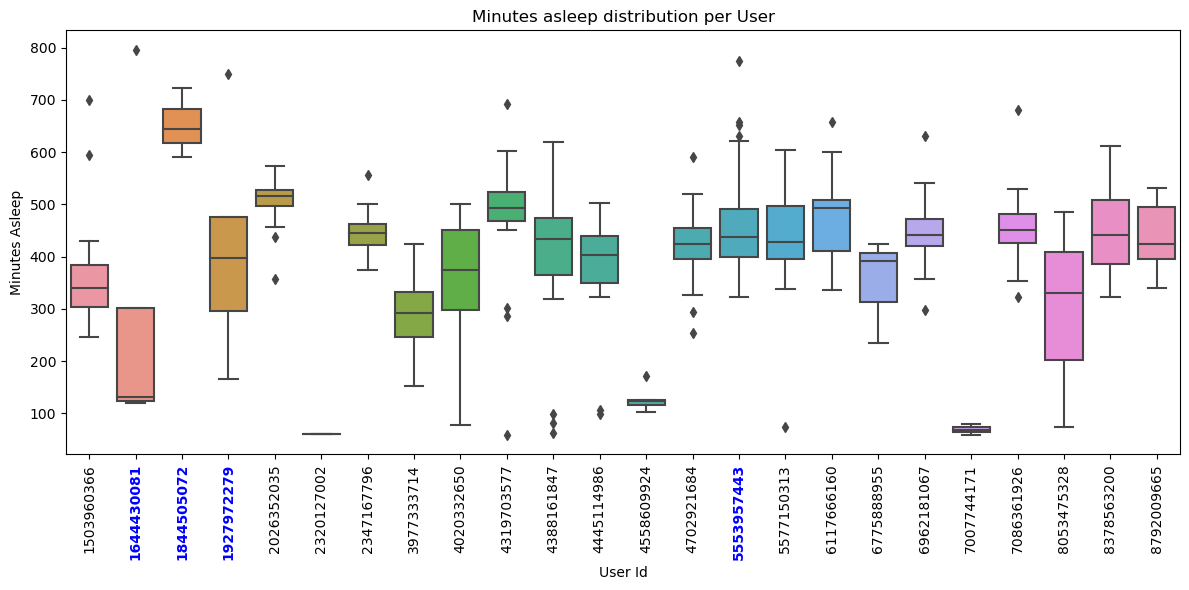

In [30]:
plt.figure(figsize=(12,6))
ax = sb.boxplot(data=d_sleep, x='Id', y='TotalMinutesAsleep')

# Let's stand out the four Ids showed before.
id_hight = ['1644430081', '1844505072', '1927972279', '5553957443']

for label in ax.get_xticklabels():
    if label.get_text() in id_hight:
        label.set_color('blue')
        label.set_fontweight('bold')
    else:
        label.set_color('black')

plt.title('Minutes asleep distribution per User')
plt.xlabel('User Id')
plt.ylabel('Minutes Asleep')
plt.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

**Outlier Consideration: Sleep Duration Over 700 Minutes**  

Records above **700 minutes asleep** appear as statistical outliers. However:  
- Three of the four users with such values have fewer than five records, making it difficult to classify them as true anomalies.  
- The fourth user has 31 sleep records, with one entry exceeding 700 minutes. Although this may seem unusual, the user consistently records longer sleep durations, suggesting it may represent valid behavior.  

Given the small sample size and variability in user patterns, these records are **retained** in the dataset. They are not central to the behavioral patterns under investigation.  

Next, we will split the **`DateActivity`** column into two new fields:  
- **Day of the week**  
- **Month**  
- **Week**

In [31]:
# Create column for the month
d_sleep['Month'] = d_sleep['SleepDay'].dt.strftime('%B')
#Create column for the day
d_sleep['Day_of_week'] = d_sleep['SleepDay'].dt.day_name()
d_sleep['Week'] = d_sleep['SleepDay'].dt.isocalendar().week

d_sleep.head(2)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Month,Day_of_week,Week
0,1503960366,2016-04-12,1,327,346,April,Tuesday,15
1,1503960366,2016-04-13,2,384,407,April,Wednesday,15


**Summary of Daily Data Cleaning**

- The `d_activity` table is a combination of `d_calories`, `d_intensities`, and `d_steps`.  
- In `d_calories`, `d_intensities`, and `d_steps`, the column **`ActivityDay`** was renamed to **`ActivityDate`** for consistency.  
- All **`ActivityDate`** columns were converted from `object` to `datetime`.  
- Column names were verified to be well-formatted, with no extra spaces.  
- No duplicated rows were found.  
- No rows were removed from any table.  
- In `d_activity` and `d_sleep`, two additional columns were created: **Month** and **Day_of_week**.  

## 2.2 Hourly Tables

### 2.2.1 Hourly Calories table

In [32]:
h_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [33]:
h_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [34]:
# Let's look for any duplicated row
h_calories.duplicated().any()

False

In [35]:
# Let's change Id to str type, and Activity hour to datatime type
h_calories['Id'] = h_calories['Id'].astype(str)

h_calories['ActivityHour'] = h_calories['ActivityHour'].str.strip()
h_calories['ActivityHour'] = pd.to_datetime(h_calories['ActivityHour'])

h_calories.dtypes

C:\Users\basti\AppData\Local\Temp\ipykernel_9444\1021359439.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  h_calories['ActivityHour'] = pd.to_datetime(h_calories['ActivityHour'])


Id                      object
ActivityHour    datetime64[ns]
Calories                 int64
dtype: object

In [36]:
# Let's see statistical info
h_calories.select_dtypes(exclude=['datetime64']).describe()

,Calories
count,22099.000000
mean,97.386760
std,60.702622
min,42.000000
25%,63.000000
50%,83.000000
75%,108.000000
max,948.000000


The dataset appears clean. Adjustments made:  
- Converted **`Id`** from `int` to `string`.  
- Converted **`ActivityHour`** from `object` to `datetime`.  
- No duplicated rows were found.  

The statistical overview shows values within expected ranges.  

### 2.2.2 Hourly Intensities table

In [37]:
h_intensities.head(3)

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667


In [38]:
h_intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [39]:
h_intensities.duplicated().any()

False

In [40]:
# Let's change Id to str type, and Activity hour to datatime type
h_intensities['Id'] = h_intensities['Id'].astype(str)

h_intensities['ActivityHour'] = h_intensities['ActivityHour'].str.strip()
h_intensities['ActivityHour'] = pd.to_datetime(h_intensities['ActivityHour'])

h_intensities.dtypes

C:\Users\basti\AppData\Local\Temp\ipykernel_9444\739378385.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  h_intensities['ActivityHour'] = pd.to_datetime(h_intensities['ActivityHour'])


Id                          object
ActivityHour        datetime64[ns]
TotalIntensity               int64
AverageIntensity           float64
dtype: object

In [41]:
h_intensities.select_dtypes(exclude='datetime64').describe()

,TotalIntensity,AverageIntensity
count,22099.000000,22099.000000
mean,12.035341,0.200589
std,21.133110,0.352219
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,0.050000
75%,16.000000,0.266667
max,180.000000,3.000000


This table shows hourly activity intensity levels, measured using a specific Fitbit metric.  
- Converted **`Id`** and **`ActivityHour`** columns to appropriate types (`string` and `datetime`).  
- No duplicated rows were found.  

### 2.2.3 Hourly Steps Table

In [42]:
h_steps.head(3)

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151


In [43]:
h_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [44]:
h_steps.duplicated().any()

False

In [45]:
# Let's change Id to str type, and Activity hour to datatime type
h_steps['Id'] = h_steps['Id'].astype(str)

h_steps['ActivityHour'] = h_steps['ActivityHour'].str.strip()
h_steps['ActivityHour'] = pd.to_datetime(h_steps['ActivityHour'])

h_steps.dtypes

C:\Users\basti\AppData\Local\Temp\ipykernel_9444\4024844552.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  h_steps['ActivityHour'] = pd.to_datetime(h_steps['ActivityHour'])


Id                      object
ActivityHour    datetime64[ns]
StepTotal                int64
dtype: object

In [46]:
h_steps.select_dtypes(exclude='datetime64').describe()

,StepTotal
count,22099.000000
mean,320.166342
std,690.384228
min,0.000000
25%,0.000000
50%,40.000000
75%,357.000000
max,10554.000000


As before, we converted **`Id`** to `string` and **`ActivityHour`** to `datetime`.  
The statistical summary indicates that the data is within normal limits.  

Next, we will split the **`ActivityDate`** column into **Date** and **Time**, and create a new column categorizing hours into periods of the day:  

- **Morning**: 05:00 – 12:00  
- **Afternoon**: 12:00 – 17:00  
- **Evening**: 17:00 – 21:00  
- **Night**: 21:00 – 05:00  

In [47]:
# Create a function to create period column
def get_time_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Make changes on hourly tables
hr_tables = [h_calories, h_intensities, h_steps]

for table in hr_tables:
    table['Time'] = table['ActivityHour'].dt.time
    table['Hour_period'] = table['ActivityHour'].dt.hour
    table['Period_of_day'] = table['Hour_period'].apply(get_time_period)


In [48]:
h_calories.head(3)

,Id,ActivityHour,Calories,Time,Hour_period,Period_of_day
0,1503960366,2016-04-12 00:00:00,81,00:00:00,0,Night
1,1503960366,2016-04-12 01:00:00,61,01:00:00,1,Night
2,1503960366,2016-04-12 02:00:00,59,02:00:00,2,Night


**Summary of Hourly Data Cleaning**

- All values appear within expected limits.  
- Converted **`Id`** to `string` and **`ActivityHour`** to `datetime`.  
- Split **`ActivityDate`** into **Date** and **Time**.  
- Created a new column to classify records by **period of the day**.  

## 2.3 Minute-Level Tables

### 2.3.1 Calories per minute

In [49]:
m_calories.head(3)

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865


In [50]:
m_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1325580 non-null  int64  
 1   ActivityMinute  1325580 non-null  object 
 2   Calories        1325580 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.3+ MB


We will:  
- Convert **`Id`** to `string`.  
- Split **`ActivityMinute`** into **Month, Day, Hour, and Minute**.  

In [51]:
# Change dtypes
m_calories['Id'] = m_calories['Id'].astype(str)
m_calories['ActivityMinute'] = pd.to_datetime(m_calories['ActivityMinute'])

# Create new columns
m_calories['Month'] = m_calories['ActivityMinute'].dt.strftime('%B')
m_calories['Day'] = m_calories['ActivityMinute'].dt.day_name()
m_calories['Hour'] = m_calories['ActivityMinute'].dt.hour
m_calories['Minute'] = m_calories['ActivityMinute'].dt.minute

m_calories.head(2)

C:\Users\basti\AppData\Local\Temp\ipykernel_9444\2831991760.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  m_calories['ActivityMinute'] = pd.to_datetime(m_calories['ActivityMinute'])


,Id,ActivityMinute,Calories,Month,Day,Hour,Minute
0,1503960366,2016-04-12 00:00:00,0.7865,April,Tuesday,0,0
1,1503960366,2016-04-12 00:01:00,0.7865,April,Tuesday,0,1


In [52]:
# We apply statistical analysis just for 'Calories' column because is the only numeric column
m_calories['Calories'].describe().round(0)

count    1325580.0
mean           2.0
std            1.0
min            0.0
25%            1.0
50%            1.0
75%            1.0
max           20.0
Name: Calories, dtype: float64

**Summary of `m_calories` Table**  

- No null values were found.  
- Converted **`Id`** to `string`.  
- Split **`ActivityMinute`** into **Month, Day, Hour, and Minute**.  
- Values fall within the expected range.  

### 2.3.2 Intensities per Minute

In [53]:
m_intensities.head(3)

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0


In [54]:
m_intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Intensity       1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [55]:
m_intensities.duplicated().any()

False

In [56]:
# Let's see how unique Intensity values are
m_intensities.nunique()

Id                   33
ActivityMinute    44160
Intensity             4
dtype: int64

In [57]:
m_intensities['Intensity'].unique()

array([0, 1, 2, 3], dtype=int64)

Fitbit defines **intensity levels** on a scale from **0 to 3**, measured per minute. These values are later aggregated to obtain hourly averages.  


In [58]:
# Let's change Id and ActivityMinute dtype to 'str' and 'datetime' respectevely.
m_intensities['Id'] = m_intensities['Id'].astype(str)
m_intensities['ActivityMinute'] = pd.to_datetime(m_intensities['ActivityMinute'])

# Split Activity Minute into Hour and minutes in two new columns.
m_intensities['Hour'] = m_intensities['ActivityMinute'].dt.hour
m_intensities['Minutes'] = m_intensities['ActivityMinute'].dt.minute

m_intensities.head(2)

C:\Users\basti\AppData\Local\Temp\ipykernel_9444\2313028530.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  m_intensities['ActivityMinute'] = pd.to_datetime(m_intensities['ActivityMinute'])


,Id,ActivityMinute,Intensity,Hour,Minutes
0,1503960366,2016-04-12 00:00:00,0,0,0
1,1503960366,2016-04-12 00:01:00,0,0,1


### 2.3.3 Steps per Minute

In [59]:
m_steps.head(3)

,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0


In [60]:
m_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Steps           1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [61]:
m_steps.duplicated().any()

False

In [62]:
m_steps.describe().round(0)

,Id,Steps
count,1.325580e+06,1325580.0
mean,4.847898e+09,5.0
std,2.422313e+09,18.0
min,1.503960e+09,0.0
25%,2.320127e+09,0.0
50%,4.445115e+09,0.0
75%,6.962181e+09,0.0
max,8.877689e+09,220.0


Approximately **75% of minute-level step records are zero**, which is expected since users spend much of the day inactive. These values are still considered valid data.  

In [63]:
# Let's change Id and ActivityMinute dtype to 'str' and 'datetime' respectevely.
m_steps['Id'] = m_steps['Id'].astype(str)
m_steps['ActivityMinute'] = pd.to_datetime(m_steps['ActivityMinute'])

# Split Activity Minute into Hour and minutes in two new columns.
m_steps['Hour'] = m_steps['ActivityMinute'].dt.hour
m_steps['Minutes'] = m_steps['ActivityMinute'].dt.minute

m_steps.head(2)

C:\Users\basti\AppData\Local\Temp\ipykernel_9444\4253405514.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  m_steps['ActivityMinute'] = pd.to_datetime(m_steps['ActivityMinute'])


,Id,ActivityMinute,Steps,Hour,Minutes
0,1503960366,2016-04-12 00:00:00,0,0,0
1,1503960366,2016-04-12 00:01:00,0,0,1


## 2.4 Heart Rate and Weight Log Data

### 2.4.1 Heart Rate per Second

In [64]:
sec_heart_rate.head(3)

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105


We will split the **`Time`** column into **Month, Day, Hour, and Minute** for easier analysis.  

In [65]:
sec_heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


We will:  
- Convert **`Id`** to `string`.  
- Convert **`Time`** to `datetime`.  

In [66]:
sec_heart_rate.duplicated().any()

False

No duplicated rows were found.

In [67]:
sec_heart_rate.describe().round(0)

,Id,Value
count,2.483658e+06,2483658.0
mean,5.513765e+09,77.0
std,1.950224e+09,19.0
min,2.022484e+09,36.0
25%,4.388162e+09,63.0
50%,5.553957e+09,73.0
75%,6.962181e+09,88.0
max,8.877689e+09,203.0


The minimum and maximum heart rate values appear abnormal and potentially unhealthy. To investigate further, we will use a boxplot visualization.  

In [68]:
# See how many Users are in these data table.
sec_heart_rate.nunique()

Id           14
Time     961274
Value       168
dtype: int64

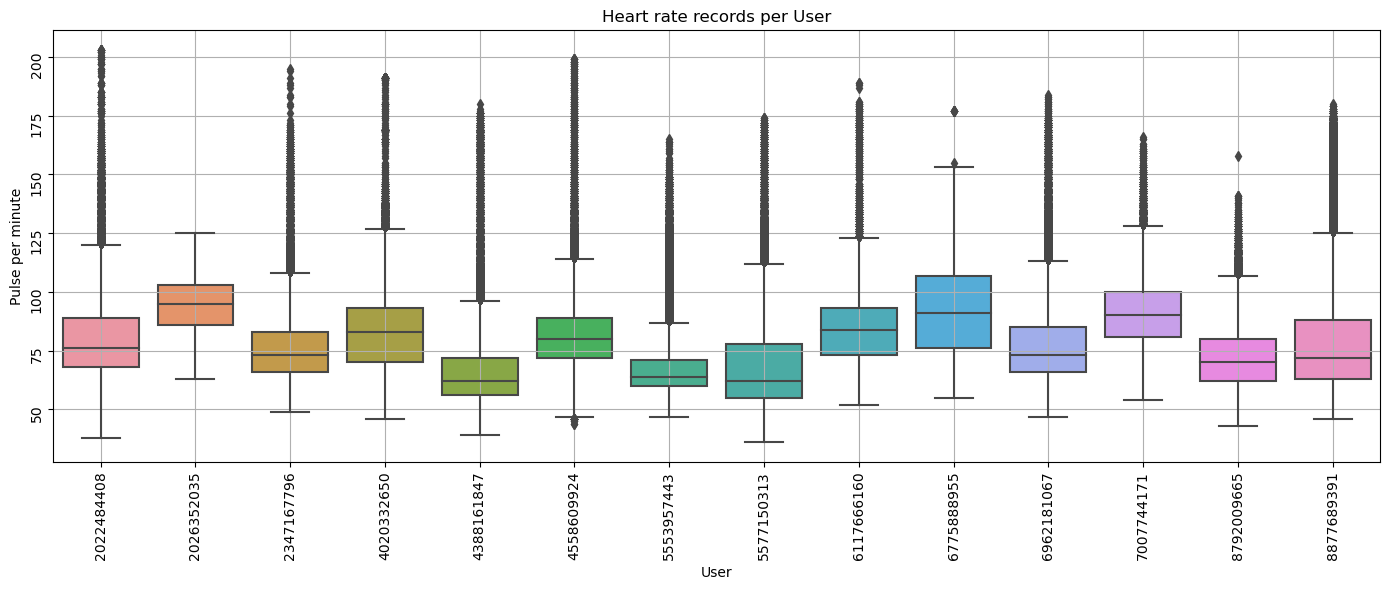

In [69]:
# Create a boxplot showing heart rate distribution for each user.

plt.figure(figsize=(14,6))
sb.boxplot(data=sec_heart_rate, x='Id', y='Value')
plt.title('Heart rate records per User')
plt.xlabel('User')
plt.ylabel('Pulse per minute')
plt.grid(True)
plt.tick_params(rotation=90)

plt.tight_layout()
plt.show()

Statistically, many heart rate values appear as outliers. However:  
- The **highest values** likely correspond to active individuals during exercise, and thus fall within acceptable limits.  
- The **lowest values** may seem alarming, but could reflect resting heart rates in exceptionally well-trained individuals.  

Therefore, we will **not treat these values as outliers**.  

In [70]:
# Let's make the changes mentioned before
# 1. Change Id and Time dtypes.
sec_heart_rate['Id'] = sec_heart_rate['Id'].astype(str)
sec_heart_rate['Time'] = pd.to_datetime(sec_heart_rate['Time'])

# 2. Split Time column to Month, Day, Time, Hour, Minutes.
sec_heart_rate['Month'] = sec_heart_rate['Time'].dt.strftime('%B')
sec_heart_rate['Day'] = sec_heart_rate['Time'].dt.day_name()
sec_heart_rate['Hour'] = sec_heart_rate['Time'].dt.hour
sec_heart_rate['Minutes'] = sec_heart_rate['Time'].dt.minute
sec_heart_rate['Seconds'] = sec_heart_rate['Time'].dt.second
sec_heart_rate['Week'] = sec_heart_rate['Time'].dt.isocalendar().week

sec_heart_rate.head(3)

,Id,Time,Value,Month,Day,Hour,Minutes,Seconds,Week
0,2022484408,2016-04-12 07:21:00,97,April,Tuesday,7,21,0,15
1,2022484408,2016-04-12 07:21:05,102,April,Tuesday,7,21,5,15
2,2022484408,2016-04-12 07:21:10,105,April,Tuesday,7,21,10,15


**Summary of Heart Rate Table (per Second)**  

- Converted **`Id`** to `string` and **`Time`** to `datetime`.  
- Created new columns: **Month, Day, Hour, Minute, Second**.  
- No null values were detected.  
- Outlier analysis suggests all values can be retained.  

### 2.4.2 Weight Log Info Table

In [71]:
Log_info.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


We will split the **`Date`** column into **Month, Day, Hour, Minute, and Second**.

In [72]:
Log_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


This table contains relatively few records compared to the others. Adjustments needed:  
- Convert **`Id`** and **`LogId`** to `string`.  
- Convert **`Date`** to `datetime`.  

Note: The **`Fat`** column has only 2 non-null entries out of 67. A decision on how to handle this missing data will be made later.  

In [73]:
# Change dtypes.
Log_info['Id'] = Log_info['Id'].astype(str)
Log_info['LogId'] = Log_info['LogId'].astype(str)
Log_info['Date'] = Log_info['Date'].str.strip()
Log_info['Date'] = pd.to_datetime(Log_info['Date'])

# Create new columns
Log_info['Month'] = Log_info['Date'].dt.strftime('%B')
Log_info['Day'] = Log_info['Date'].dt.day_name()
Log_info['Hour'] = Log_info['Date'].dt.hour
Log_info['Minute'] =  Log_info['Date'].dt.minute
Log_info['Second'] = Log_info['Date'].dt.second

Log_info.head(2)

C:\Users\basti\AppData\Local\Temp\ipykernel_9444\4166217781.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Log_info['Date'] = pd.to_datetime(Log_info['Date'])


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,Month,Day,Hour,Minute,Second
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.65,True,1462233599000,May,Monday,23,59,59
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.65,True,1462319999000,May,Tuesday,23,59,59


In [74]:
Log_info.select_dtypes(exclude='datetime64').describe()

,WeightKg,WeightPounds,Fat,BMI,Hour,Minute,Second
count,67.000000,67.000000,2.00000,67.000000,67.000000,67.000000,67.000000
mean,72.035821,158.811801,23.50000,25.185224,16.567164,52.537313,48.014925
std,13.923206,30.695415,2.12132,3.066963,8.219017,10.705887,18.173818
min,52.599998,115.963147,22.00000,21.450001,1.000000,8.000000,0.000000
25%,61.400002,135.363832,22.75000,23.959999,6.000000,49.000000,43.500000
50%,62.500000,137.788914,23.50000,24.389999,23.000000,59.000000,59.000000
75%,85.049999,187.503152,24.25000,25.559999,23.000000,59.000000,59.000000
max,133.500000,294.317120,25.00000,47.540001,23.000000,59.000000,59.000000


Recorded values fall within expected ranges.  

In [75]:
# Let's see how many users are on this data table, and how many entries per user.
print(Log_info['Id'].unique())
Log_info['Id'].value_counts()

['1503960366' '1927972279' '2873212765' '4319703577' '4558609924'
 '5577150313' '6962181067' '8877689391']


Id
6962181067    30
8877689391    24
4558609924     5
1503960366     2
2873212765     2
4319703577     2
1927972279     1
5577150313     1
Name: count, dtype: int64

Out of the 8 users present in this table, only 2 have a substantial number of records.  
Given this imbalance, the dataset may be **biased** and should be interpreted with caution.  

In [76]:
# Let's see to whom the 'Fat' entries belong to
Log_info.groupby('Id')['Fat'].apply(lambda x:x.notnull().sum())

Id
1503960366    1
1927972279    0
2873212765    0
4319703577    1
4558609924    0
5577150313    0
6962181067    0
8877689391    0
Name: Fat, dtype: int64

The users who recorded body fat data are not the same ones with a substantial number of records. Possible reasons include: 

- Users may not know their body fat percentage.  
- The device may not calculate body fat automatically.  
- Users may not understand or care about this metric.  

From this, we can conclude that **users rarely enter their body fat information**. 

This presents an opportunity for Bellabeat to:  
- Enable automated body fat calculation in future devices, or  
- Develop a new product that integrates body fat measurement with existing devices.  

**Summary of `Log_Info` Table**

- Converted **`Id`** and **`LogId`** to `string`, and **`Time`** to `datetime`.  
- Split **`Time`** into **Month, Day, Hour, Minute, and Second**.  
- Only 8 users are represented in this table.  
- Of these, only 2 users have a significant number of records.  
- Users generally do not record body fat data.

## Does this Database Meet the ROCCC Criteria?

#### Reliable  
The dataset appears reliable, with multiple data points collected from Fitbit devices. The source (Kaggle, linked to Zenodo.org) is trustworthy. Some inaccuracies exist in certain tables, but these can be addressed during cleaning.  

#### Original  
The dataset originates from Zenodo.org and is considered the original version.  

#### Comprehensive  
The dataset is comprehensive and well-structured, covering activity, calories, intensities, sleep, log information, and METs at different time intervals. It is suitable for addressing the objectives of this project.  

#### Current  
The dataset is not current. It was collected in 2016, while this project is being conducted in 2023. However, since the goal is to demonstrate data analysis skills rather than address a real-time issue, this is acceptable.  

#### Cited  
The dataset is properly cited and publicly available on Kaggle: [Fitbit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit).  

✅ Overall, the dataset meets most of the ROCCC criteria and is appropriate for this project.  

# SECTION 3: Process the Data.

We will use **Python** in combination with **SQL** to process the data.  
All CSV files will be imported into a database named **`fit_base.db`**, where each file will be stored as a separate table.  

In [77]:
import sqlite3

## Import table to the database
conn = sqlite3.connect('FitBit_database.db')
## Daily tables
d_activity.to_sql('daily_activity', conn, index=False, if_exists='replace')
d_sleep.to_sql('daily_sleep', conn, index=False, if_exists='replace')

## Hourly tables
h_calories.to_sql('hourly_calories', conn, index=False, if_exists='replace')
h_intensities.to_sql('hourly_intensities', conn, index=False, if_exists='replace')
h_steps.to_sql('hourly_steps', conn, index=False, if_exists='replace')

## Tables per minute
m_calories.to_sql('minute_calories', conn, index=False, if_exists='replace')
m_intensities.to_sql('minute_intensities', conn, index=False, if_exists='replace')
m_steps.to_sql('minute_steps', conn, index=False, if_exists='replace')

## Other tables
sec_heart_rate.to_sql('sec_heart_rate', conn, index=False, if_exists='replace')
Log_info.to_sql('log_info', conn, index=False, if_exists='replace')

conn.close()

# SECTION 4: Analyze the Data.

The methodology for this section includes:  
1. Querying the database using **SQL** to retrieve relevant data.  
2. Creating **visualizations** to identify trends and patterns.  

## 4.1. Analizing Daily tables.

### 4.1.1 Daily Activity Table

We aim to identify the days when users are most physically active.  
To begin, we will determine how many users can be classified as **active** versus **inactive**.  

In [78]:
## A view just to remember table columns.
d_activity.head(1)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Month,Day_of_week,Number_of_week
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,April,Tuesday,15


In [79]:
## Let's see if people are active or not by calculating weekly activity minutes average

conn = sqlite3.connect('FitBit_database.db')
cur = conn.cursor()
cur.execute("""
            SELECT
                Id,
                AVG(Days_Fairly_Active) AS Avg_Fair_day_per_week,
                AVG(Days_Very_Active) AS Avg_Very_Days_per_week,
                CASE WHEN AVG(Days_Fairly_Active) > 2.5 THEN 1 ELSE 0 END AS Users_fairly_active,
                CASE WHEN AVG(Days_Very_Active) > 2.5 THEN 1 ELSE 0 END AS Users_very_active,
                CASE WHEN AVG(Days_Fairly_Active) > 2.5 OR AVG(Days_Very_Active) > 2.5 THEN 1 ELSE 0 END AS Active_Users
            FROM
                (SELECT
                    Id,
                    Number_of_week,
                    COUNT(CASE WHEN FairlyActiveMinutes >= 20 THEN 1 ELSE NULL END) AS Days_Fairly_Active,
                    COUNT(CASE WHEN VeryActiveMinutes >= 20 THEN 1 ELSE NULL END) AS Days_Very_Active
                FROM 
                    daily_activity
                GROUP BY 
                    Id, Number_of_week)
            GROUP BY
                Id
            ORDER BY Avg_Fair_day_per_week DESC
            ;""")
ans = cur.fetchall()
cur.close()

Weekly_AVG_Activity_Minutes = pd.DataFrame(ans, columns=[
    'Id',
    'Avg_Fair_day_per_week',
    'Avg_Very_Days_per_week',
    'Users_Fairly_active',
    'Users_very_active',
    'Active_Users'
])

Weekly_AVG_Activity_Minutes.head(2)

,Id,Avg_Fair_day_per_week,Avg_Very_Days_per_week,Users_Fairly_active,Users_very_active,Active_Users
0,3977333714,4.6,2.4,1,0,1
1,5577150313,3.8,5.4,1,1,1


In [80]:
# Create a new table for the pie chart
Weekly_AVG_Activity_Minutes_pie = pd.DataFrame({
    'Users_fairly_active':[Weekly_AVG_Activity_Minutes['Users_Fairly_active'].sum()/len(Weekly_AVG_Activity_Minutes)],
    'Users_very_active':[Weekly_AVG_Activity_Minutes['Users_very_active'].sum()/len(Weekly_AVG_Activity_Minutes)],
    'Active_users':[Weekly_AVG_Activity_Minutes['Active_Users'].sum()/len(Weekly_AVG_Activity_Minutes)]
})
Weekly_AVG_Activity_Minutes_pie.head()

,Users_fairly_active,Users_very_active,Active_users
0,0.30303,0.333333,0.454545


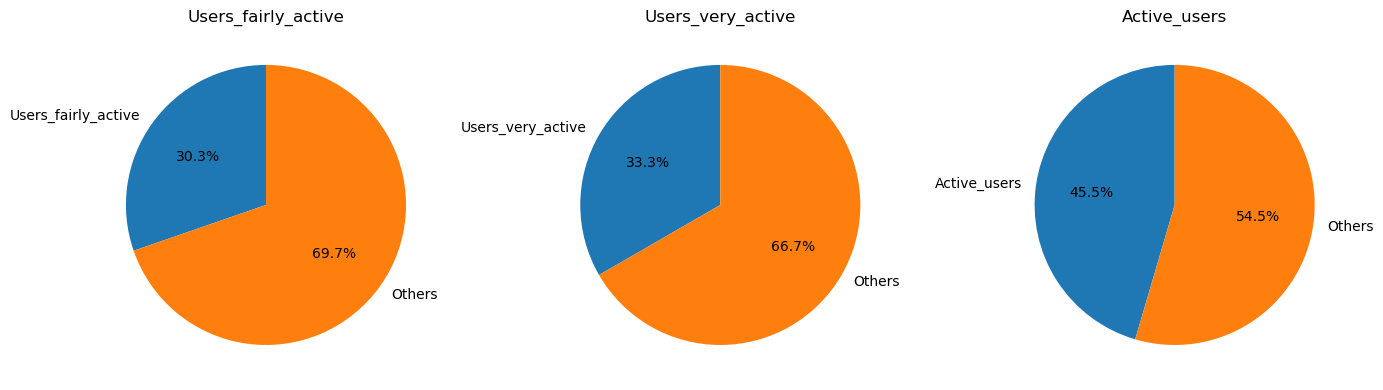

In [81]:
# Create pie charts
values = Weekly_AVG_Activity_Minutes_pie.iloc[0]

# Plot one pie per column
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

for ax, col in zip(axes, values.index):
    val = values[col]
    ax.pie([val, 1-val], labels=[col, 'Others'], autopct='%1.1f%%', startangle=90)
    ax.set_title(col)

plt.tight_layout()
plt.show()

By setting a threshold of at least **3 days per week** with **20+ minutes** of activity:  
- **30% of users** qualify as fairly active.  
- **33% of users** qualify as very active.  
- Considering users who meet either threshold (or a combination), **45.5% of users** can be classified as active overall.  

These insights suggest that while a notable share of users engage in active behaviors, the majority either maintain less active lifestyles or may not consistently use the device during physical activity.  

Next, we will examine whether active users’ activities are primarily related to **walking or running**.  
This will be assessed by comparing the **average weekly distance covered** with the **time spent in different activity levels**.  

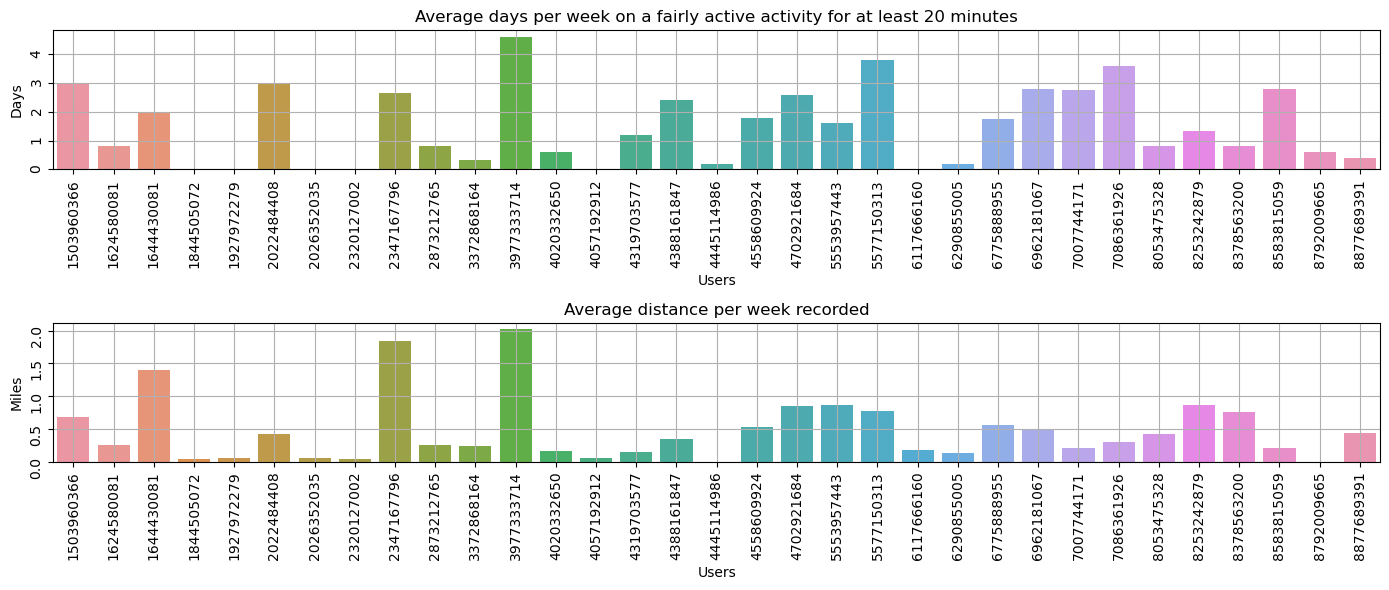

In [82]:
conn = sqlite3.connect('FitBit_database.db')
cur = conn.cursor()
cur.execute("""
            SELECT
                Id,
                AVG(Days_Fairly_Active) AS Avg_Fair_day_per_week,
                AVG(Days_Very_Active) AS Avg_Very_Days_per_week,
                AVG_Moderately_Active_Distance,
                AVG_Very_Active_Distance
            FROM
                (SELECT
                    Id,
                    Number_of_week,
                    COUNT(CASE WHEN FairlyActiveMinutes >= 20 THEN 1 ELSE NULL END) AS Days_Fairly_Active,
                    COUNT(CASE WHEN VeryActiveMinutes >= 20 THEN 1 ELSE NULL END) AS Days_Very_Active,
                    AVG(ModeratelyActiveDistance) AS AVG_Moderately_Active_Distance,
                    AVG(VeryActiveDistance) AS AVG_Very_Active_Distance
                FROM 
                    daily_activity
                GROUP BY 
                    Id, Number_of_week)
            GROUP BY
                Id
            ;""")
ans = cur.fetchall()
cur.close()

Activity_and_distance_relations = pd.DataFrame(ans, columns=[
    'Id',
    'Avg_Fair_day_per_week',
    'Avg_Very_Days_per_week',
    'AVG_Moderately_Active_Distance',
    'AVG_Very_Active_Distance',
])

# Making a bar graph
fig, axes = plt.subplots(2, 1, figsize=(14, 6))
axes = axes.flatten()

sb.barplot(data=Activity_and_distance_relations, x='Id', y='Avg_Fair_day_per_week', ax=axes[0])
axes[0].set_title('Average days per week on a fairly active activity for at least 20 minutes')
axes[0].set_xlabel('Users')
axes[0].set_ylabel('Days')
axes[0].grid(True)
axes[0].tick_params(rotation=90)

sb.barplot(data=Activity_and_distance_relations, x='Id', y='AVG_Moderately_Active_Distance', ax=axes[1])
axes[1].set_title('Average distance per week recorded')
axes[1].set_xlabel('Users')
axes[1].set_ylabel('Miles')
axes[1].grid(True)
axes[1].tick_params(rotation=90)

plt.tight_layout()
plt.show()

In [83]:
# Calculations
users_to_distance = (((Activity_and_distance_relations['Avg_Fair_day_per_week'] > 2.5) & (Activity_and_distance_relations['AVG_Moderately_Active_Distance'] >= 1)).sum()) / (Activity_and_distance_relations['Avg_Fair_day_per_week'] > 2.5).sum()
print(f'Percentage of users that walk or run more than 1 mile at Moderately Active intensity: {users_to_distance}')

Percentage of users that walk or run more than 1 mile at Moderately Active intensity: 0.2


Only **20% of fairly active users** (≥3 days/week, ≥20 minutes/day) walk or run more than 1 mile on average.  
This indicates that most fairly active users engage in activities **other than distance-based exercises**.  

Now, let’s examine **very active users**.  

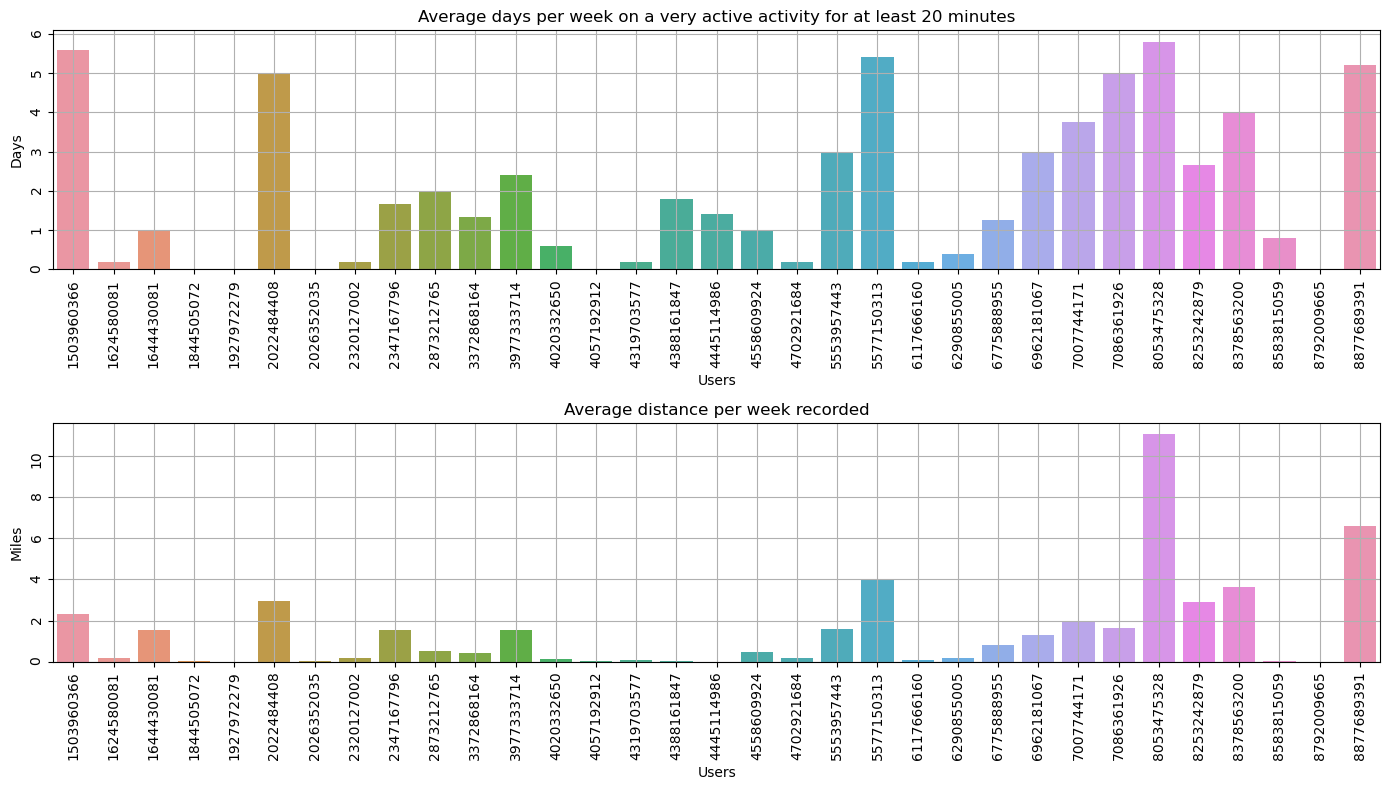

In [84]:
# Making a bar graph
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
axes = axes.flatten()

sb.barplot(data=Activity_and_distance_relations, x='Id', y='Avg_Very_Days_per_week', ax=axes[0])
axes[0].set_title('Average days per week on a very active activity for at least 20 minutes')
axes[0].set_xlabel('Users')
axes[0].set_ylabel('Days')
axes[0].grid(True)
axes[0].tick_params(rotation=90)

sb.barplot(data=Activity_and_distance_relations, x='Id', y='AVG_Very_Active_Distance', ax=axes[1])
axes[1].set_title('Average distance per week recorded')
axes[1].set_xlabel('Users')
axes[1].set_ylabel('Miles')
axes[1].grid(True)
axes[1].tick_params(rotation=90)

plt.tight_layout()
plt.show()

In [85]:
users_to_distance_very_active = (((Activity_and_distance_relations['Avg_Very_Days_per_week'] > 2.5) & (Activity_and_distance_relations['AVG_Very_Active_Distance'] >= 1)).sum()) / (Activity_and_distance_relations['Avg_Very_Days_per_week'] > 2.5).sum()
print(f'Percentage of users that walk or run more than 1 mile at Very Active intensity: {users_to_distance_very_active}')

Percentage of users that walk or run more than 1 mile at Very Active intensity: 1.0


We find that **100% of very active users** (≥3 days/week, ≥20 minutes/day) participate in **distance-based activities** such as walking or running.

In [86]:
# Analize light activity.
d_activity[['LightlyActiveMinutes', 'LightActiveDistance']].describe()

,LightlyActiveMinutes,LightActiveDistance
count,940.000000,940.000000
mean,192.812766,3.340819
std,109.174700,2.040655
min,0.000000,0.000000
25%,127.000000,1.945000
50%,199.000000,3.365000
75%,264.000000,4.782500
max,518.000000,10.710000


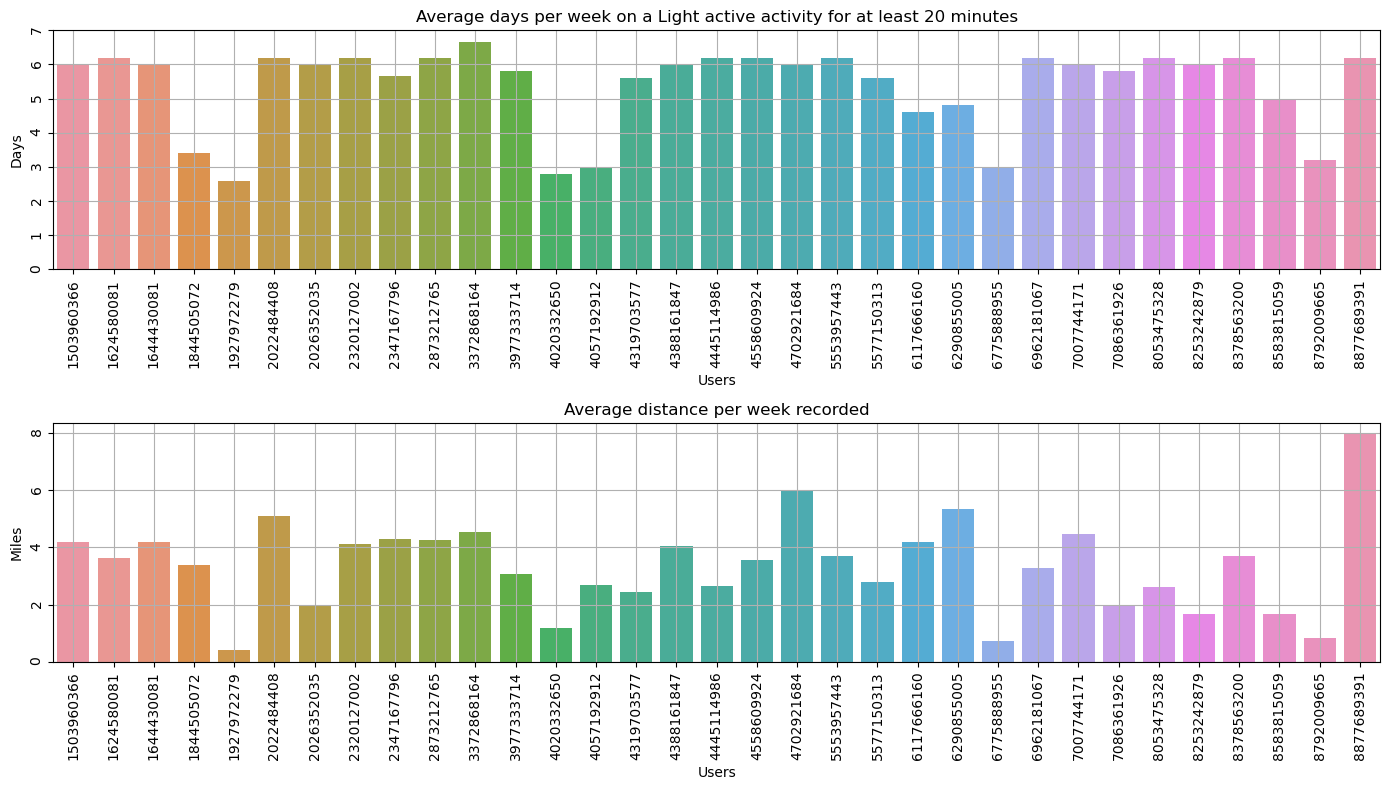

In [87]:
conn = sqlite3.connect('FitBit_database.db')
cur = conn.cursor()
cur.execute("""
            SELECT
                Id,
                AVG(Days_Lightly_Active) AS Avg_Light_day_per_week,
                AVG_Light_Active_Distance
            FROM
                (SELECT
                    Id,
                    Number_of_week,
                    COUNT(CASE WHEN LightlyActiveMinutes >= 20 THEN 1 ELSE NULL END) AS Days_Lightly_Active,
                    AVG(LightActiveDistance) AS AVG_Light_Active_Distance
                FROM 
                    daily_activity
                GROUP BY 
                    Id, Number_of_week)
            GROUP BY
                Id
            ;""")
ans = cur.fetchall()
cur.close()

Activity_and_distance_relations_Light = pd.DataFrame(ans, columns=[
    'Id',
    'Avg_Light_day_per_week',
    'AVG_Light_Active_Distance',
])

# Making a bar graph
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
axes = axes.flatten()

sb.barplot(data=Activity_and_distance_relations_Light, x='Id', y='Avg_Light_day_per_week', ax=axes[0])
axes[0].set_title('Average days per week on a Light active activity for at least 20 minutes')
axes[0].set_xlabel('Users')
axes[0].set_ylabel('Days')
axes[0].grid(True)
axes[0].tick_params(rotation=90)

sb.barplot(data=Activity_and_distance_relations_Light, x='Id', y='AVG_Light_Active_Distance', ax=axes[1])
axes[1].set_title('Average distance per week recorded')
axes[1].set_xlabel('Users')
axes[1].set_ylabel('Miles')
axes[1].grid(True)
axes[1].tick_params(rotation=90)

plt.tight_layout()
plt.show()

Users record significantly more **light activity** than fairly or very active activities.  
Most of these records are also linked to **distance-based measures** (steps, distance covered).  

This suggests that while users tend to track **light activities** throughout the week, fairly active sessions are often associated with **non-distance activities**.  

Next, we will analyze **steps and calories by month** to identify potential seasonal or stationary patterns.

In [88]:
conn = sqlite3.connect('FitBit_database.db')
cur = conn.cursor()
cur.execute("""
            SELECT
                Month,
                AVG(TotalSteps) AS avg_steps,
                AVG(Calories) AS avg_calories
            FROM
                daily_activity
            GROUP BY
                Month
            ;""")
ans = cur.fetchall()
cur.close()

Steps_cal_per_month = pd.DataFrame(ans, columns=[
    'Month',
    'AVG_Steps',
    'AVG_Calories'
])
Steps_cal_per_month.head()

,Month,AVG_Steps,AVG_Calories
0,April,7811.327332,2342.646481
1,May,7315.851064,2231.112462


Data is only available for **April and May**, which is insufficient to detect meaningful seasonal patterns.  

Next, we will analyze activity by **day of the week**.

In [89]:
conn = sqlite3.connect('FitBit_database.db')
cur = conn.cursor()
cur.execute("""
            SELECT
                Day_of_week,
                AVG(TotalSteps) AS avg_steps,
                AVG(LightlyActiveMinutes) AS avg_lightly_min,
                AVG(FairlyActiveMinutes) AS avg_fairly_min,
                AVG(VeryActiveMinutes) AS avg_active_min
            FROM
                daily_activity
            GROUP BY
                Day_of_week
            ORDER BY CASE Day_of_week
                WHEN 'Monday'     THEN 1
                WHEN 'Tuesday'    THEN 2
                WHEN 'Wednesday' THEN 3
                WHEN 'Thursday'    THEN 4
                WHEN 'Friday'   THEN 5
                WHEN 'Saturday'    THEN 6
                WHEN 'Sunday'   THEN 7
            END
            ;""")
ans = cur.fetchall()
cur.close()

Steps_cal_per_day = pd.DataFrame(ans, columns=[
    'Day',
    'AVG_Steps',
    'avg_lightly_min',
    'avg_fairly_min',
    'avg_active_min'
])
Steps_cal_per_day.head()

,Day,AVG_Steps,avg_lightly_min,avg_fairly_min,avg_active_min
0,Monday,7780.866667,192.058333,14.000000,23.108333
1,Tuesday,8125.006579,197.342105,14.335526,22.953947
2,Wednesday,7559.373333,189.853333,13.100000,20.780000
3,Thursday,7405.836735,185.421769,11.959184,19.408163
4,Friday,7448.230159,204.198413,12.111111,20.055556


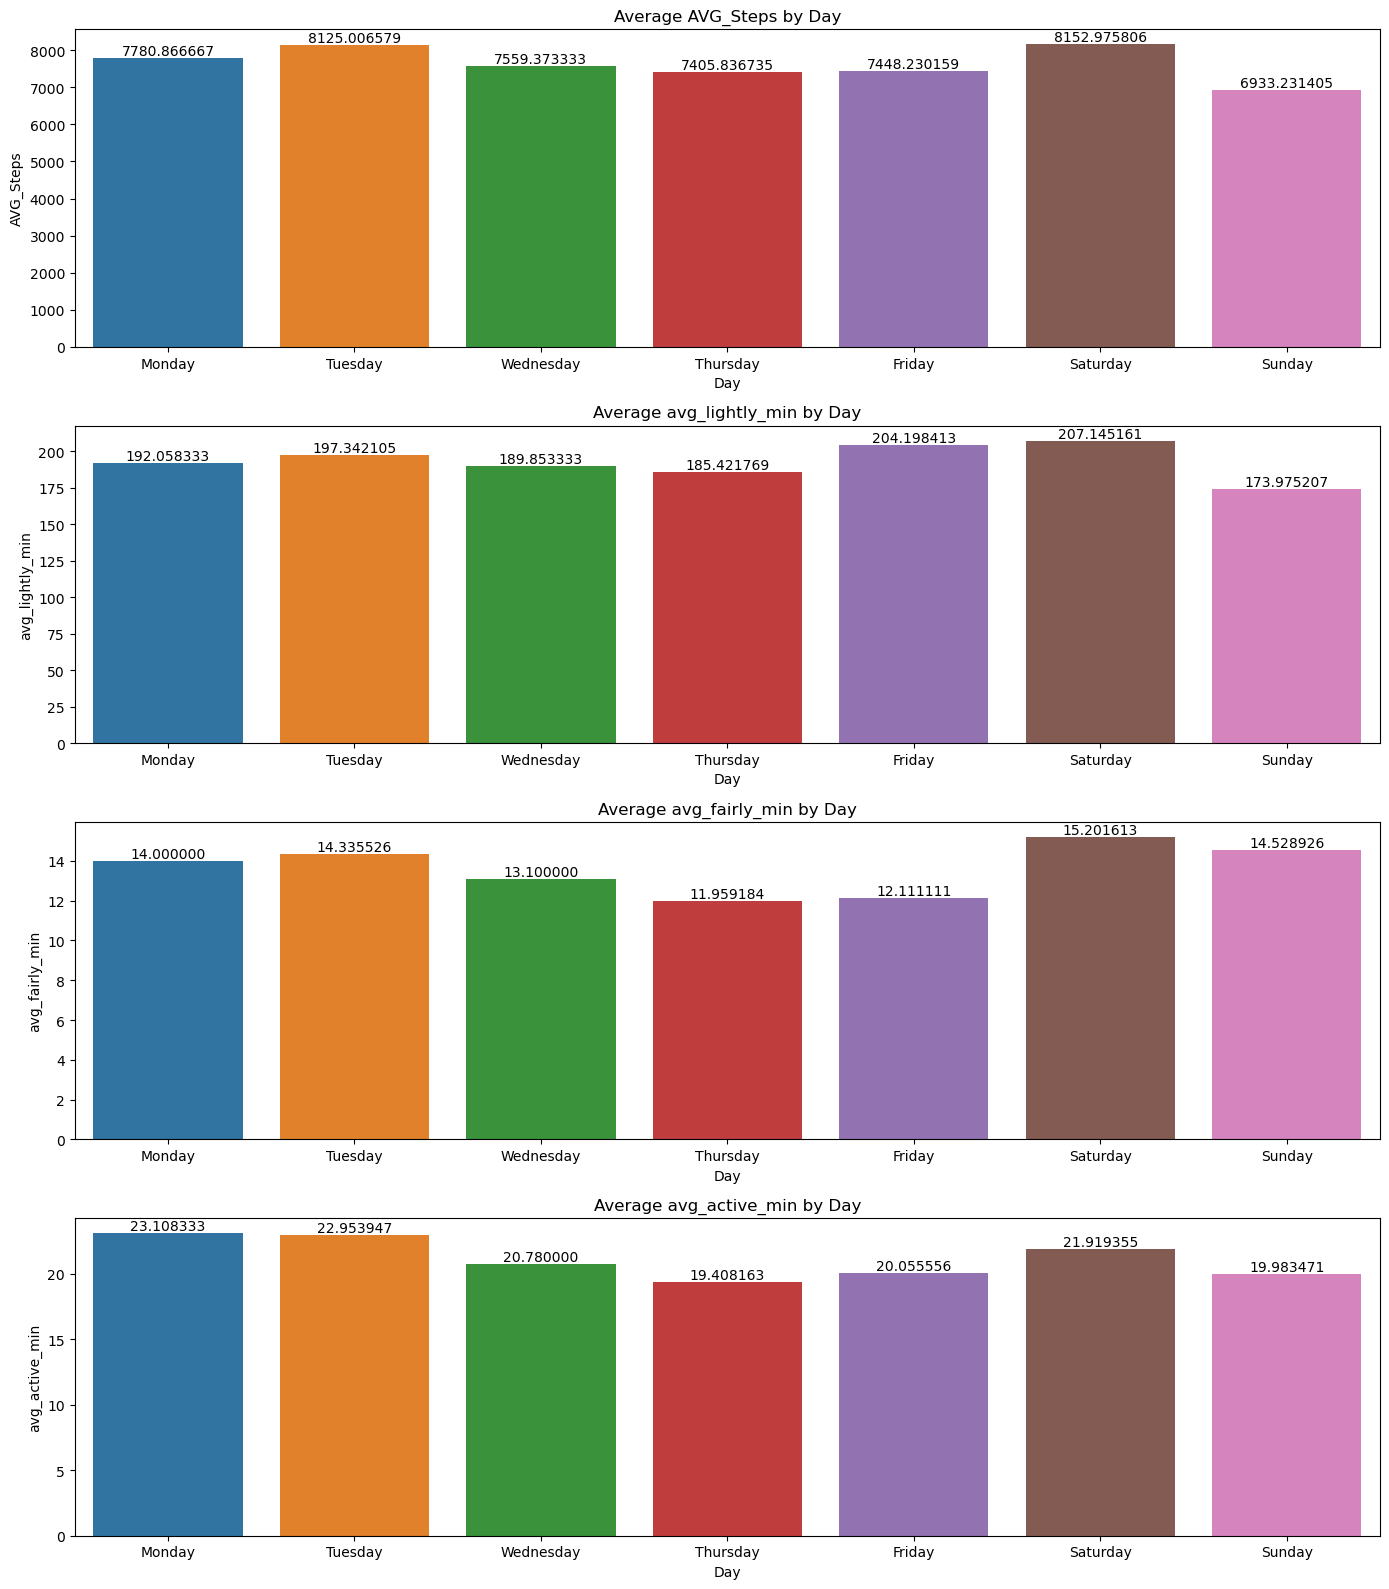

In [90]:
# Plotting
columnas = ['AVG_Steps', 'avg_lightly_min', 'avg_fairly_min',
       'avg_active_min']

fig, axes = plt.subplots(4, 1, figsize=(14,16))
axes = axes.flatten()

for i, col in enumerate(columnas):
    ax = axes[i]
    sb.barplot(Steps_cal_per_day, x='Day', y=col, ax=ax)

    for container in ax.containers:
        ax.bar_label(container, fmt='%2f')

    axes[i].set_title(f'Average {col} by Day')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Day')

plt.tight_layout()
plt.show()

Users tend to be more active on **Monday, Tuesday, and Saturday**. For fairly and very active activities, **Sunday** is also relevant.  
In contrast, activity levels **drop midweek (Wednesday–Friday)**.  

This pattern may be explained by:  
1. More free time on weekends, allowing longer exercise sessions.  
2. High motivation at the start of the week (Monday/Tuesday), which tends to decrease as the week progresses.  

💡 **Business Insight**: This creates an opportunity to highlight how Bellabeat devices can help users **sustain motivation midweek**, ensuring consistency toward their health goals.

### 4.1.5 Daily Sleep Table

In [91]:
d_sleep.select_dtypes(exclude='datetime64').describe()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Week
count,413.000000,413.000000,413.000000,413.0
mean,1.118644,419.467312,458.639225,16.789346
std,0.345521,118.344679,127.101607,1.272061
min,1.000000,58.000000,61.000000,15.0
25%,1.000000,361.000000,403.000000,16.0
50%,1.000000,433.000000,463.000000,17.0
75%,1.000000,490.000000,526.000000,18.0
max,3.000000,796.000000,961.000000,19.0


In [92]:
d_sleep['SleepDay'].nunique()

31

In [93]:
d_sleep['Id'].nunique()

24

The dataset contains **31 recorded days** and **24 users**.  
Next, we will calculate how many times each user recorded sleep data.

In [94]:
conn = sqlite3.connect('FitBit_database.db')
cur = conn.cursor()
cur.execute("""
            SELECT
                Id,
                COUNT(Id) AS records,
                AVG(TotalMinutesAsleep) AS avg_min_asleep,
                AVG(TotalTimeInBed) AS avg_time_in_bed
            FROM
                daily_sleep
            GROUP BY
                Id
            ;""")
ans = cur.fetchall()
cur.close()

sleep_user_info = pd.DataFrame(ans, columns=[
    'Id',
    'records',
    'avg_min_asleep',
    'avg_time_in_bed'
])
sleep_user_info.head(2)

,Id,records,avg_min_asleep,avg_time_in_bed
0,1503960366,25,360.28,383.2
1,1644430081,4,294.00,346.0


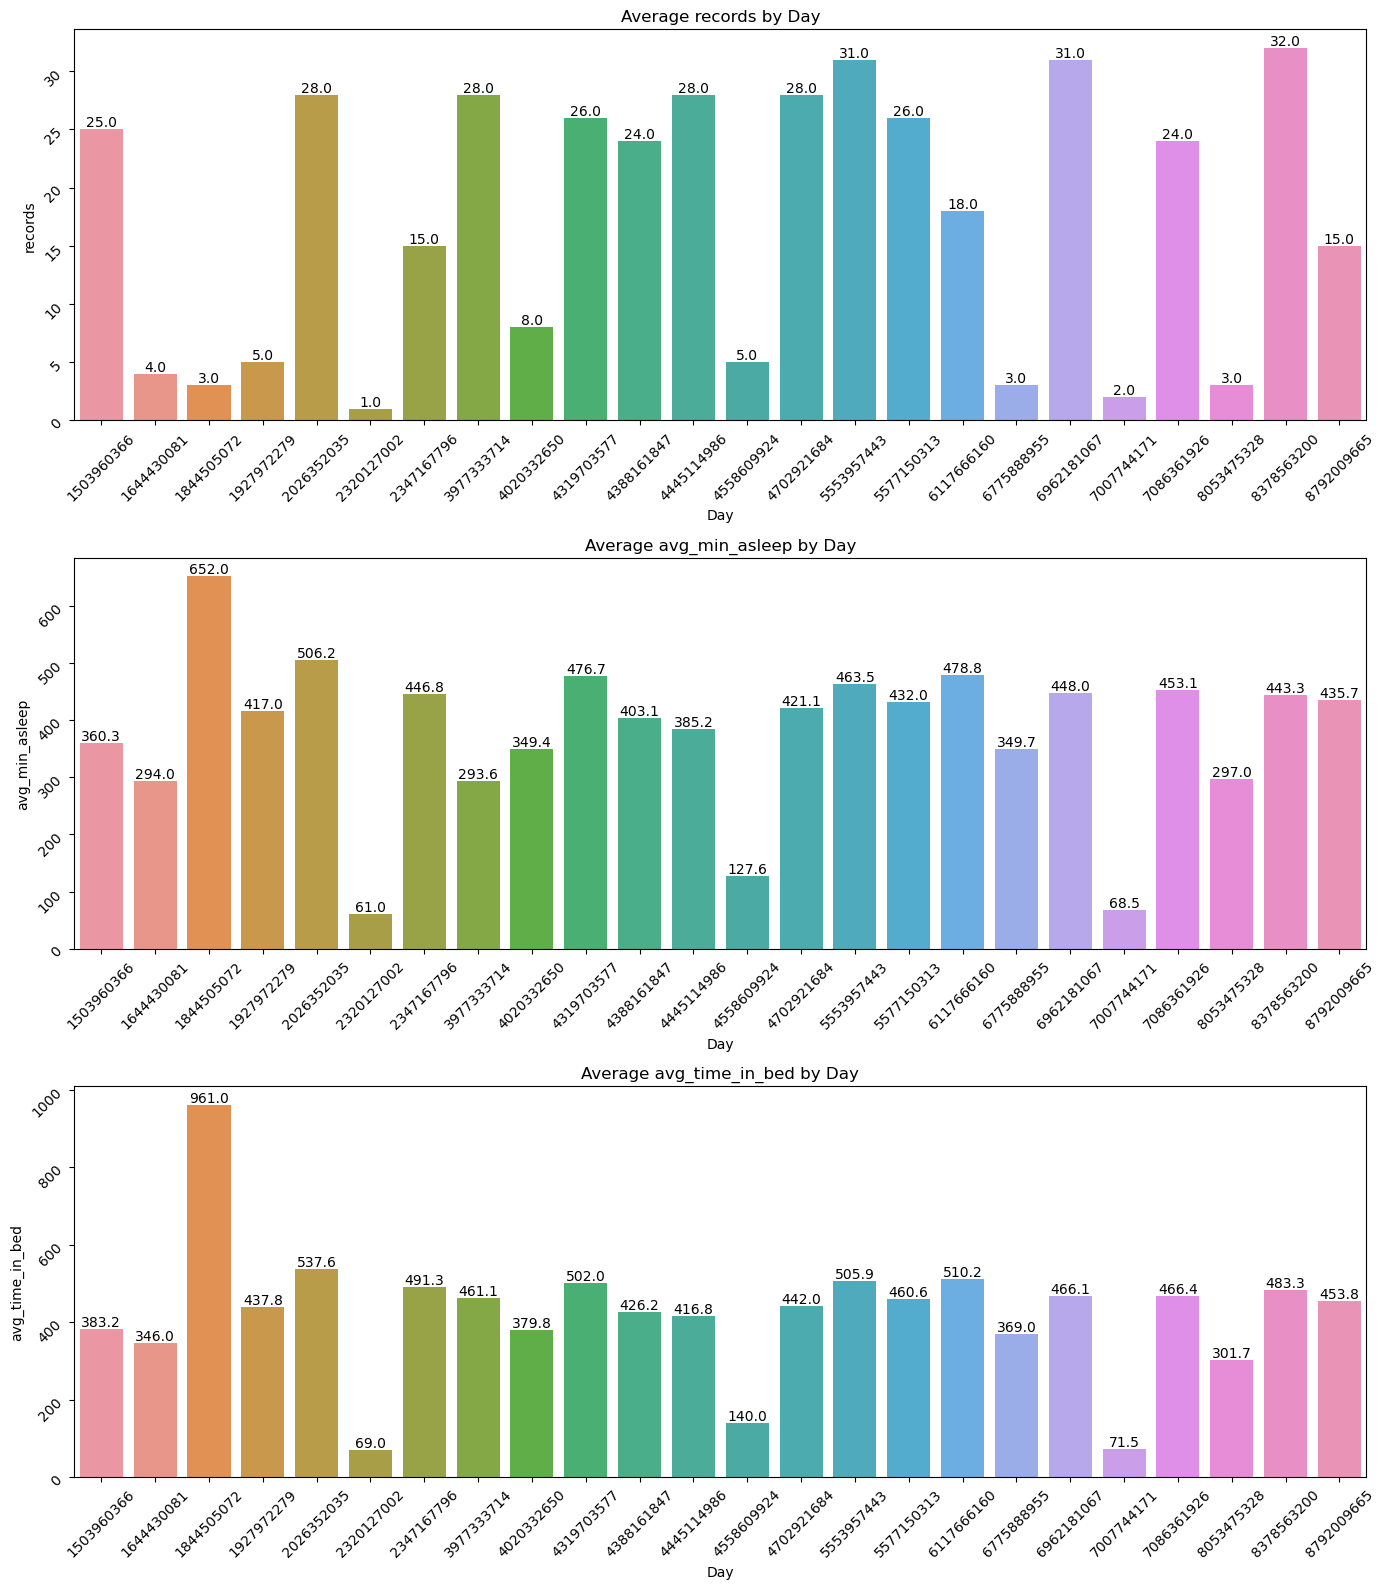

In [95]:
# Plotting
columnas2 = ['records', 'avg_min_asleep', 'avg_time_in_bed']

fig, axes = plt.subplots(3, 1, figsize=(14,16))
axes = axes.flatten()

for i, col in enumerate(columnas2):
    ax = axes[i]
    sb.barplot(sleep_user_info, x='Id', y=col, ax=ax)

    for container in ax.containers:
        ax.bar_label(container, fmt='{:.1f}'.format)

    axes[i].set_title(f'Average {col} by Day')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Day')
    axes[i].tick_params(rotation=45)

plt.tight_layout()
plt.show()

In [96]:
conn = sqlite3.connect('FitBit_database.db')
cur = conn.cursor()
cur.execute("""
            SELECT
                COUNT(*)
            FROM
                (
                SELECT
                    Id,
                    COUNT(Id) AS records,
                    AVG(TotalMinutesAsleep) AS avg_min_asleep,
                    AVG(TotalTimeInBed) AS avg_time_in_bed
                FROM
                    daily_sleep
                GROUP BY
                    Id 
                )
            WHERE
                records >= 10
            ;""")
ans = cur.fetchall()
cur.close()

print(ans)

[(15,)]


We find that **62.5% of users** recorded sleep data at least **10 times**.  
Next, we will analyze how frequently users log their sleep **per week**.

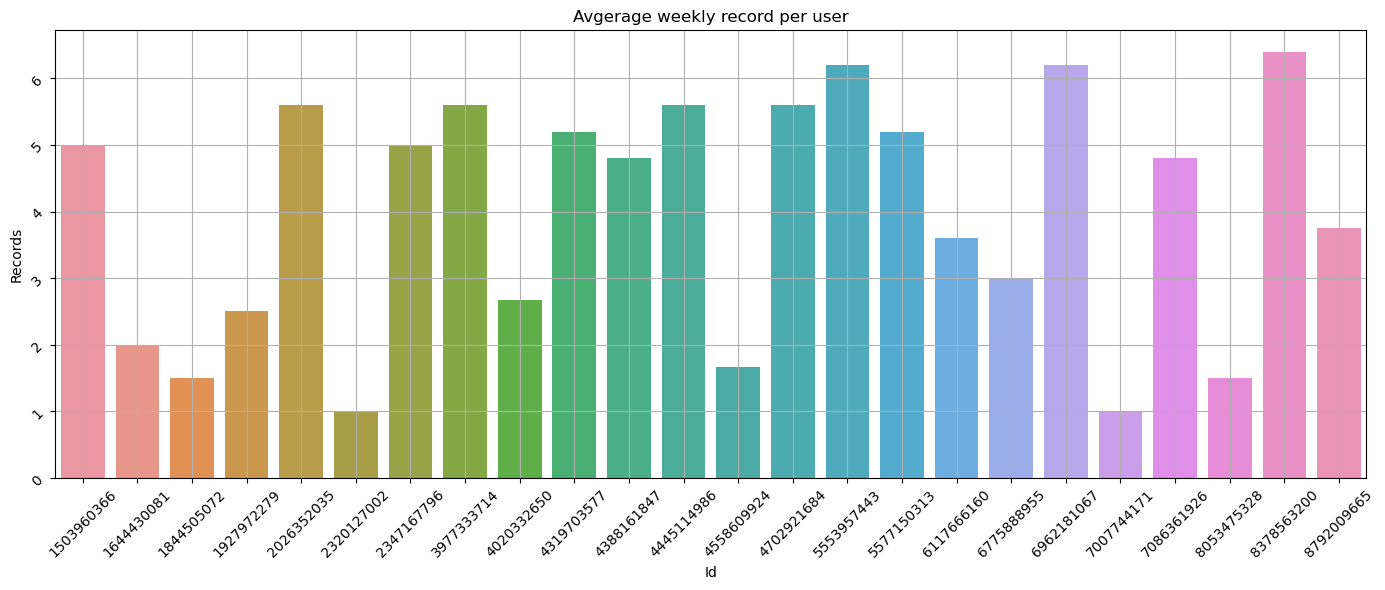

In [97]:
conn = sqlite3.connect('FitBit_database.db')
cur = conn.cursor()
cur.execute("""
            SELECT
                Id,
                AVG(records) AS avg_weekly_record
            FROM
                (
                SELECT
                    Id,
                    Week,
                    COUNT(Id) AS records
                FROM
                    daily_sleep
                GROUP BY
                    Id, Week
                )
            GROUP BY
                Id
            ;""")
ans = cur.fetchall()
cur.close()

weekly_sleep_users = pd.DataFrame(ans, columns=[
    'Id',
    'avg_weekly_record'
])

plt.figure(figsize=(14,6))
sb.barplot(data=weekly_sleep_users, x='Id', y='avg_weekly_record')
plt.title('Avgerage weekly record per user')
plt.xlabel('Id')
plt.ylabel('Records')
plt.tick_params(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Our analysis shows that:  
- **54% of users** track their sleep at least **5 days per week**, indicating consistent engagement.  
- **25% of users** record their sleep only **once per week**, suggesting a less engaged segment.  

Overall, sleep tracking is actively used by a significant portion of users.  
💡 **Business Insight**: This highlights an opportunity to strengthen Bellabeat’s **value proposition** by enhancing and promoting its sleep monitoring features.

## 4.2 Analyzing Hourly Tables

### 4.2.1 Hourly Intensities Table

We have already identified the **days of the week** when users are most active.  
The next step is to analyze the **time of day** when activity levels peak. 

In [98]:
h_intensities.head(2)

,Id,ActivityHour,TotalIntensity,AverageIntensity,Time,Hour_period,Period_of_day
0,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00,0,Night
1,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00,1,Night


In [107]:
conn = sqlite3.connect('FitBit_database.db')
cur = conn.cursor()
cur.execute("""
            SELECT 
                Period_of_day,
                AVG(q_intensity1) AS avg_q_intensity1,
                AVG(q_intensity2) AS avg_q_intensity2,
                AVG(q_intensity3) AS avg_q_intensity3
            FROM
                (SELECT
                    Id,
                    Period_of_day,
                    COUNT(CASE WHEN AverageIntensity >= 0 AND AverageIntensity <=1 THEN AverageIntensity ELSE NULL END) AS q_intensity1,
                    COUNT(CASE WHEN AverageIntensity > 1 AND AverageIntensity <=2 THEN AverageIntensity ELSE NULL END) AS q_intensity2,
                    COUNT(CASE WHEN AverageIntensity > 2 AND AverageIntensity <=3 THEN AverageIntensity ELSE NULL END) AS q_intensity3
                FROM
                    hourly_intensities
                GROUP BY
                    Id, Period_of_day)
            GROUP BY
                Period_of_day
            ;""")
ans = cur.fetchall()
cur.close()

intensity_per_period = pd.DataFrame(ans, columns=[
    'Period_of_day',
    'avg_q_intensity1',
    'avg_q_intensity2',
    'avg_q_intensity3'
])
display(intensity_per_period)

,Period_of_day,avg_q_intensity1,avg_q_intensity2,avg_q_intensity3
0,Afternoon,131.333333,6.606061,1.030303
1,Evening,102.939394,5.333333,1.545455
2,Morning,190.181818,5.121212,2.030303
3,Night,221.606061,1.818182,0.121212


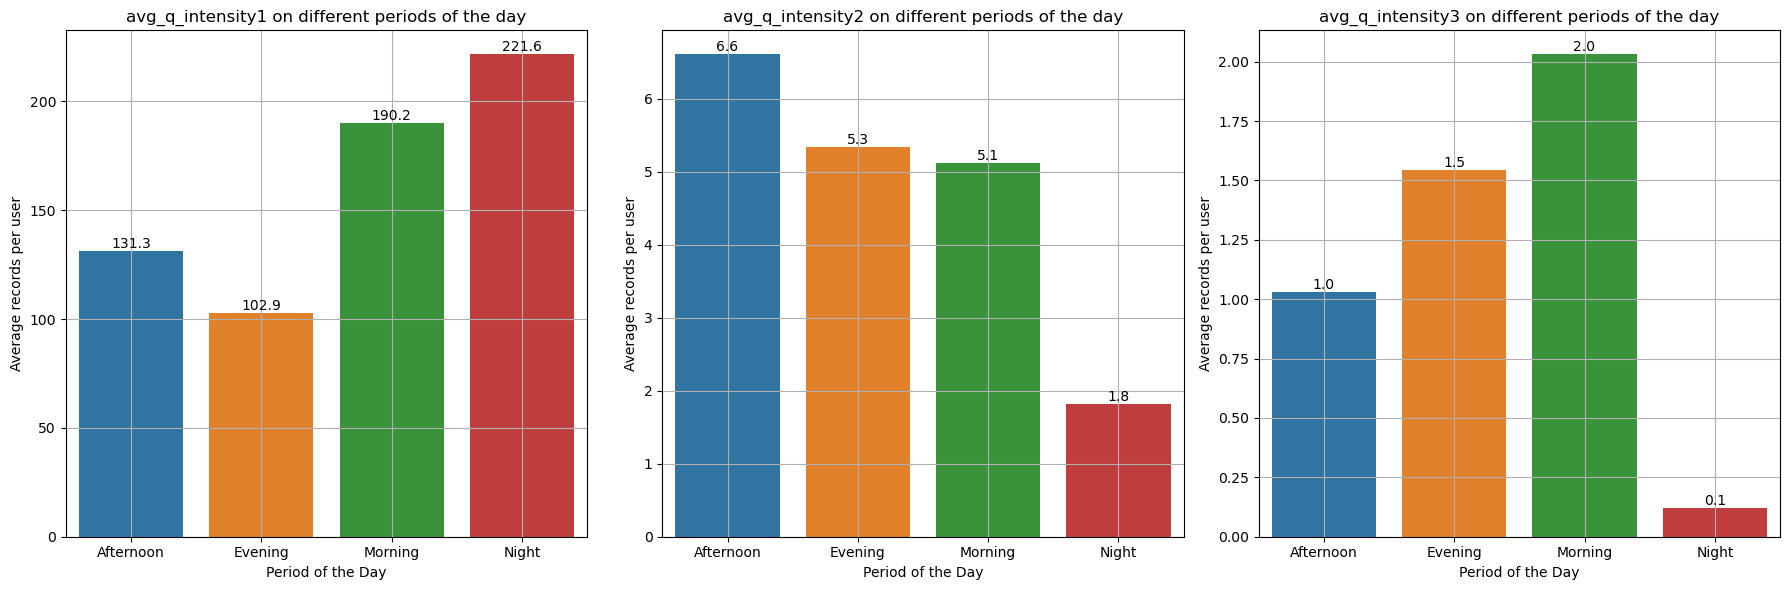

In [112]:
# Plotting last result

fig, axes = plt.subplots(1, 3, figsize=(18,6))

info = ['avg_q_intensity1', 'avg_q_intensity2', 'avg_q_intensity3']

for i, col in enumerate(info):

    ax=axes[i]
    sb.barplot(data=intensity_per_period, x='Period_of_day', y=col, ax=axes[i])

    for container in ax.containers:
        ax.bar_label(container, fmt='{:.1f}'.format)

    axes[i].set_title(f'{col} on different periods of the day')
    axes[i].set_xlabel('Period of the Day')
    axes[i].set_ylabel('Average records per user')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


Users tend to engage in **very active activities in the morning**, while **fairly active activities are more common in the afternoon**.  

**Business Insight**:  
- Tailor **notifications and campaigns** to these time windows, reaching users when they are most receptive.  
- Introduce **time-specific challenges** to boost engagement and strengthen interaction with the platform.

### 4.2.2 Hourly Steps Table

In [113]:
h_steps.head(2)

,Id,ActivityHour,StepTotal,Time,Hour_period,Period_of_day
0,1503960366,2016-04-12 00:00:00,373,00:00:00,0,Night
1,1503960366,2016-04-12 01:00:00,160,01:00:00,1,Night


In [116]:
conn = sqlite3.connect('FitBit_database.db')
cur = conn.cursor()
cur.execute("""
            SELECT
                Period_of_day,
                AVG(StepTotal) AS avg_steps
            FROM
                hourly_steps
            GROUP BY
                Period_of_day
            ;""")
ans = cur.fetchall()
cur.close()

steps_per_period = pd.DataFrame(ans, columns=[
    'Period_of_day',
    'avg_steps'
])
display(steps_per_period)

,Period_of_day,avg_steps
0,Afternoon,506.171391
1,Evening,521.674669
2,Morning,332.379914
3,Night,94.760336


Text(0.5, 1.0, 'Average Steps per period of the day')

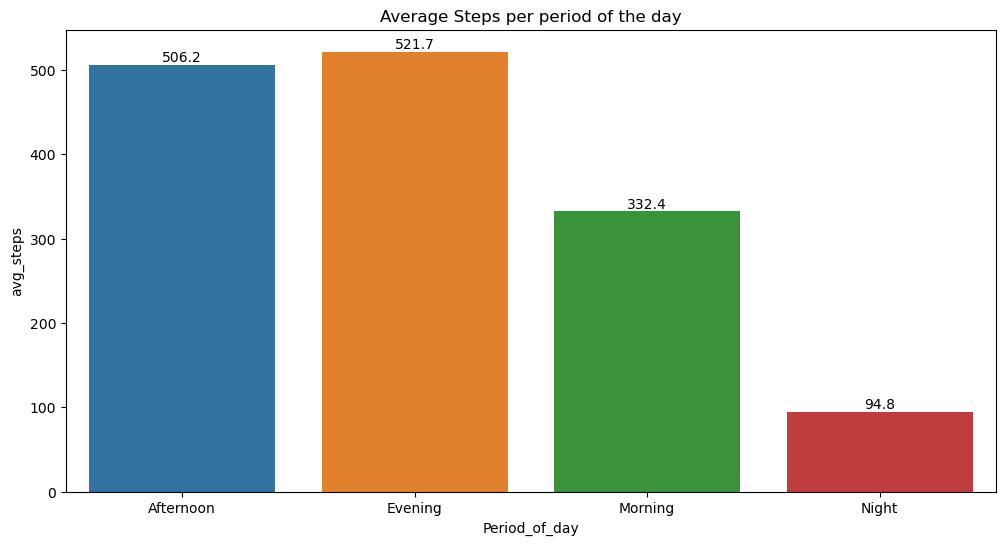

In [120]:
# Plotting
plt.figure(figsize=(12,6))
ax = sb.barplot(data=steps_per_period, x='Period_of_day', y='avg_steps')
for container in ax.containers:
        ax.bar_label(container, fmt='{:.1f}'.format)

ax.set_title('Average Steps per period of the day')

Most steps are recorded in the **afternoon and evening**, which aligns with our earlier finding:  
- Users engaging in **fairly active activities** often perform **distance-based exercises** (e.g., walking).  
- These activities are more frequently practiced later in the day.

## 4.3 Analyzing Other Tables

### 4.3.1 Log Info Table

In [121]:
Log_info.head(2)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,Month,Day,Hour,Minute,Second
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.65,True,1462233599000,May,Monday,23,59,59
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.65,True,1462319999000,May,Tuesday,23,59,59


As noted earlier, this table includes data from only **8 users**, making it less representative of the broader dataset.  
Nevertheless, we will examine the distribution of **user weight**.

In [122]:
conn = sqlite3.connect('FitBit_database.db')
cur = conn.cursor()
cur.execute("""
            SELECT
                Id,
                AVG(WeightKg) AS Weight
            FROM
                log_info
            GROUP BY
                Id
            ;""")
ans = cur.fetchall()
cur.close()

user_weight = pd.DataFrame(ans, columns=[
    'Id',
    'Weight'
])
display(user_weight)

,Id,Weight
0,1503960366,52.599998
1,1927972279,133.500000
2,2873212765,57.000000
3,4319703577,72.350002
4,4558609924,69.639999
5,5577150313,90.699997
6,6962181067,61.553334
7,8877689391,85.145834


We observe a wide range of user weights, with no clear pattern emerging.  

Next, we will analyze whether these users recorded their data **manually or automatically**.

In [123]:
conn = sqlite3.connect('FitBit_database.db')
cur = conn.cursor()
cur.execute("""
            SELECT
                Id,
                COUNT(CASE WHEN IsManualReport = True THEN 1 ELSE NULL END) AS Manual_Report,
                COUNT(CASE WHEN IsManualReport = False THEN 1 ELSE NULL END) AS No_Manual_Report
            FROM
                log_info
            GROUP BY
                Id
            ;""")
ans = cur.fetchall()
cur.close()

log_in_info = pd.DataFrame(ans, columns=[
    'Id',
    'Manual_log',
    'No_manual_log'
])
display(log_in_info)

,Id,Manual_log,No_manual_log
0,1503960366,2,0
1,1927972279,0,1
2,2873212765,2,0
3,4319703577,2,0
4,4558609924,5,0
5,5577150313,0,1
6,6962181067,30,0
7,8877689391,0,24


Two users account for the majority of records in this table:  
- One user logs data **manually**.  
- The other relies on **automatic tracking**.  

Among the remaining users, most records are also entered manually, despite being fewer in number.  

**Hypothesis**: Users may be more inclined to manually input their information rather than rely solely on automatic recording.

# SECTION 5: Conclusions and Business Insights

## Key Findings

- **Activity Levels:** Approximately 45% of users can be classified as active (≥3 days/week with ≥20 minutes of activity). Among them:

    - Very active users tend to engage in distance-based activities (walking, running).

    - Fairly active users are more associated with non-distance activities (e.g., other exercises).

- **Training Patterns:**

    - Activity peaks on Sunday, Monday, and Tuesday, with a decline mid-week.

    - Morning sessions are more common among very active users, while fairly active activity is more frequent in the afternoon/evening.

- **Sleep Tracking:** Around 54% of users track sleep consistently (≥5 days/week), showing strong engagement with this feature.

- **User Reporting Behavior:** A significant portion of data comes from manual input, suggesting that users are willing to log information actively.

## Recomendations

1. **Promote Sleep Monitoring:** Given the high adoption of sleep tracking, Bellabeat should strengthen its value proposition by improving sleep analytics and emphasizing this feature in marketing campaigns.

2. **Leverage Activity Trends:**

    - Target users with campaigns encouraging mid-week activity, where engagement drops.

    - Create personalized nudges for evening workouts, appealing to fairly active users.

3. **Product Development:**

    - Enhance features for distance-based training (running, walking), aligning with very active users.

    - Develop content and challenges for alternative activities to better engage fairly active users.

4. **User Experience:** Encourage automatic data collection (through better device synchronization) while maintaining manual input as a complementary feature.

## Limitations

- Dataset size is relatively small and restricted to 33 users, wich limits generalizability.

- Data was collected in 2016, so trends may not fully reflect current user behaviors.

## Final Note

Despite limitations, the analysis highlights clear opportunities: Bellabeat can differentiate its product offering by focusing on sleep tracking, distance-based activities, and behavior-driven nudges. These insights can guide data-driven marketing strategies and product innovation, positioning Bellabeat to strengthen its market presence.